# Credit Card Fraud Detection by MagdElDin AbdalRaaof and Yassin Riad

# Data Visualisation

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

We'll load the dataframe first

In [6]:
df = pd.read_csv('creditcard_2023.csv')

We check for any null values

No null values are present

In [52]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Word of note, A Class value of 1 means the transaction is fraudulent

Now we'll see the details of each of the columns (except the class) for further analysis.

We do this by checking the column itself, then the fraudulent subset, then the non-fraudulent subset.

Here we create a function to help us visualize

We also made a function to draw a heatmap matrix to check correlations

In [9]:
def plot_hist_and_box(df,col):
    fig, ax = plt.subplots(2, 3, figsize=(30, 10))

    ax[0,0].set_title('Histogram for All Transactions')
    sns.histplot(data=df, x=col, ax=ax[0,0])

    ax[0,1].set_title('Histogram for Fraudulent Transactions')
    sns.histplot(data=df[df['Class'] == 1], x=col, ax=ax[0,1])

    ax[0,2].set_title('Histogram for Legitimate Transactions')
    sns.histplot(data=df[df['Class'] == 0], x=col, ax=ax[0,2])

    ax[1,0].set_title('Boxplot for All Transactions')
    sns.boxplot(data=df, x=col, ax=ax[1,0])

    ax[1,1].set_title('Boxplot for Fraudulent Transactions')
    sns.boxplot(data=df[df['Class'] == 1], x=col, ax=ax[1,1])

    ax[1,2].set_title('Boxplot for Legitimate Transactions')
    sns.boxplot(data=df[df['Class'] == 0], x=col, ax=ax[1,2])

plt.show()


In [4]:
def draw_heat_graph(df):
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Heatmap for dataframe")
    plt.show()

## Without Changing Data

### V1

We can see the overall column is mostly Gaussian and the fraudulent transactions are more Gaussian, but the non-fraudulent transactions are weird since they seem to operate in waves

The fraudulent traansactions seem to emphasize the point of having a standard distribution since even the outliers are almost balaneced across both sides.

The legitimate transactions have many outliers on the lower end of the spectrum

The inclusion of both makes the box plot for the overall column a mix where it is shifted to the right like the legitimate transactions but it has less outliers as a consequence of mixing both


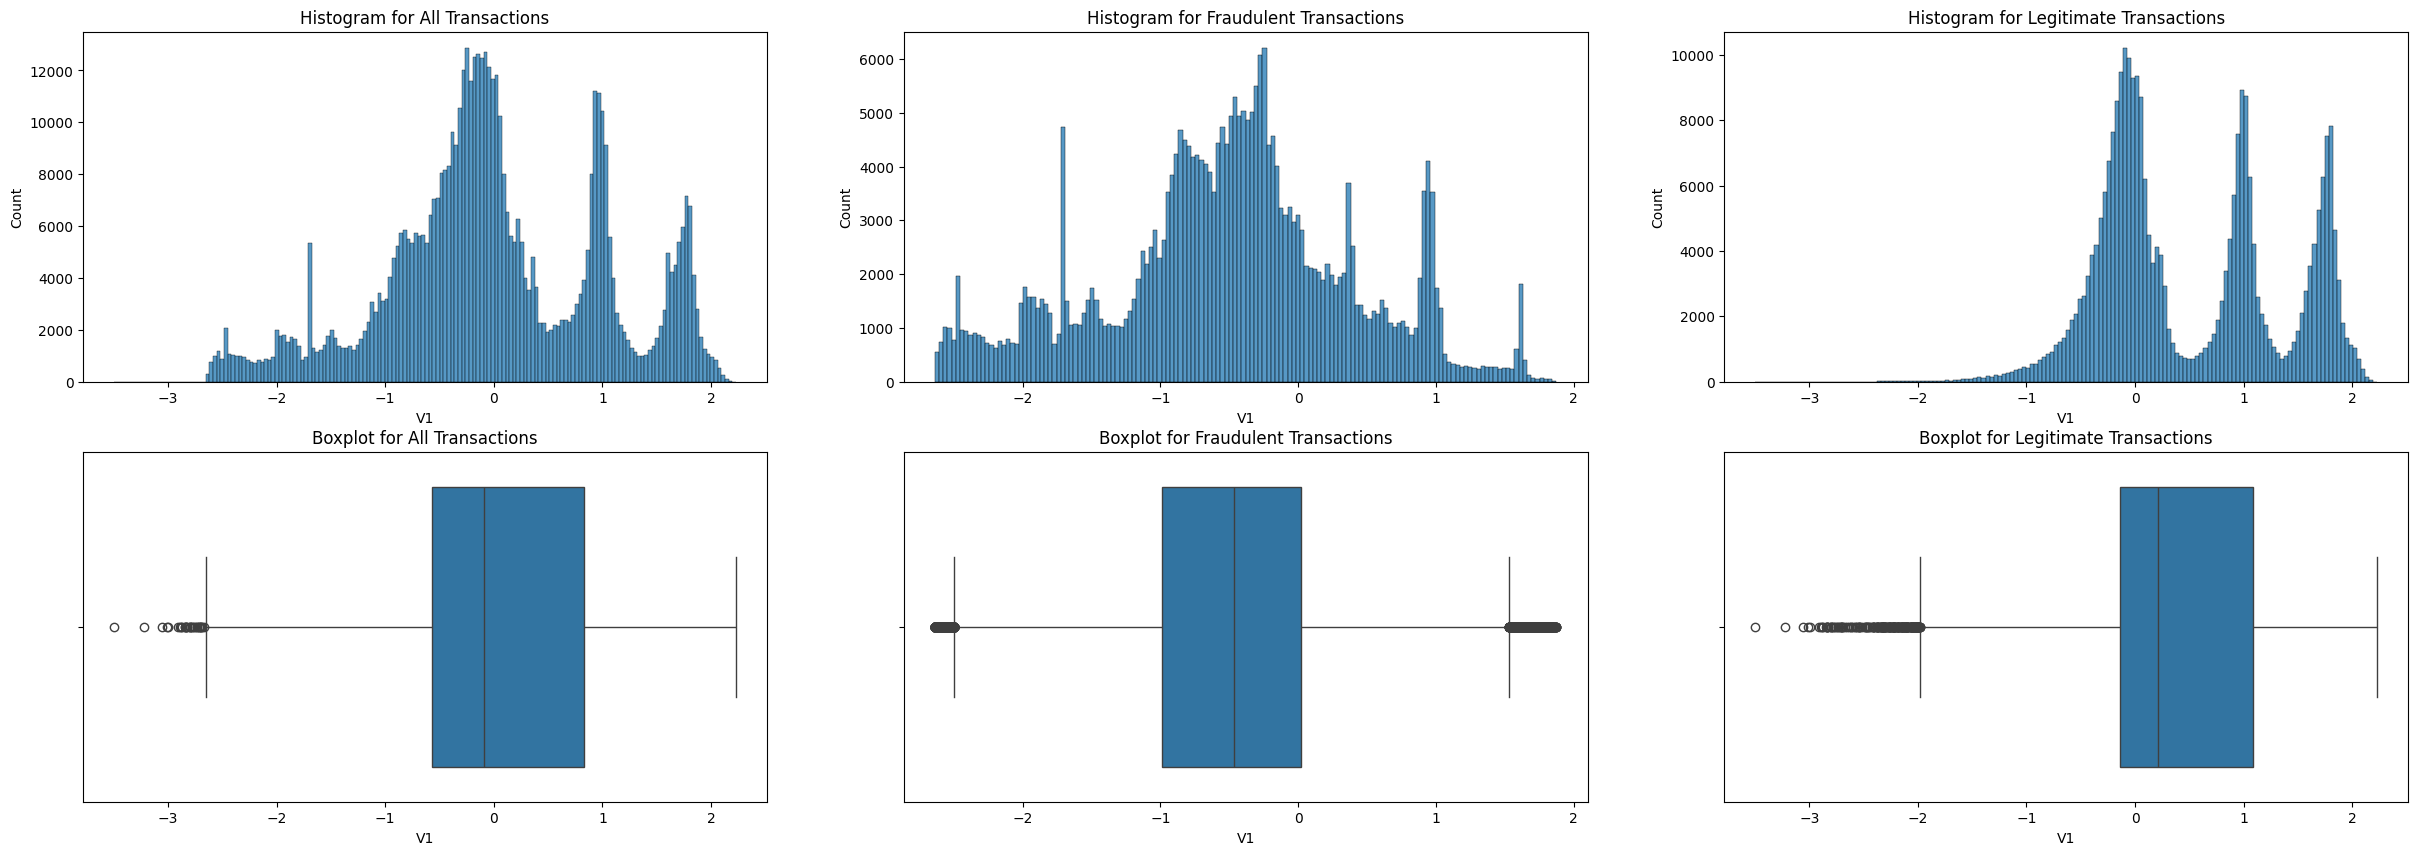

In [50]:
plot_hist_and_box(df,'V1')

### V2

V2 clearly has severe outliers messing with the data, notably it is a legitimate transaction as the fraudulent transactions are Gaussian while the legitimate transactions share the skewed shape of the main column.

The box plots prove our hypothesis of an outlier being present among the legitimate transactions.

So far, it seems that fraudulent transactions follow a certain pattern while legitimate transactions are much more random. Whether or not this holds true for the rest of the dataset remains to be seen

At this point, I started noticing repetition in the code that warrants the creation of a function for our plotting purposes. Initially the code was copied and pasted, but this will change now and applied retroactively

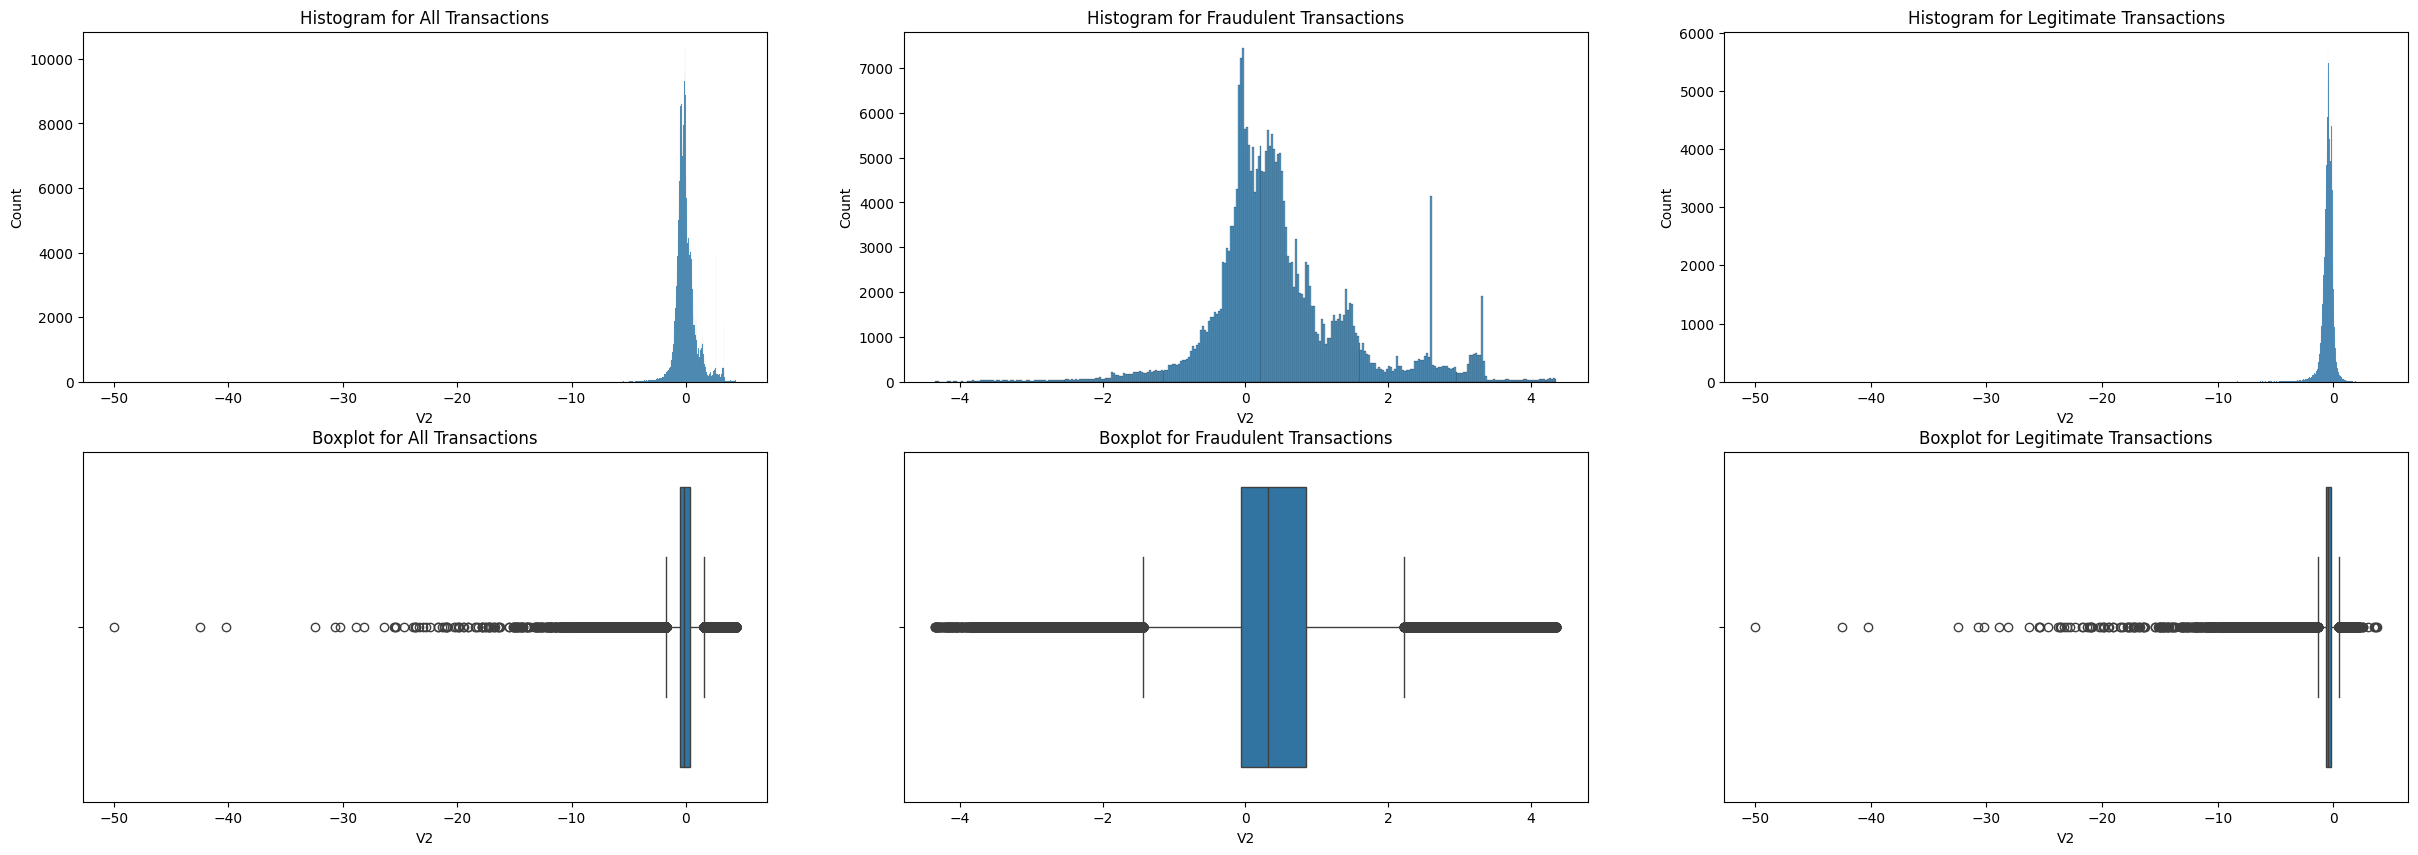

In [51]:
plot_hist_and_box(df,'V2')

### V3

Most of these are almost Gaussian, which is great since that only means we need to shift a little bit. We do need to not the absurd outlier caused by a legitimate transaction.

We can also note that legitimate transactions are much more tightly distributed while fraudulent transactions are more spread out.

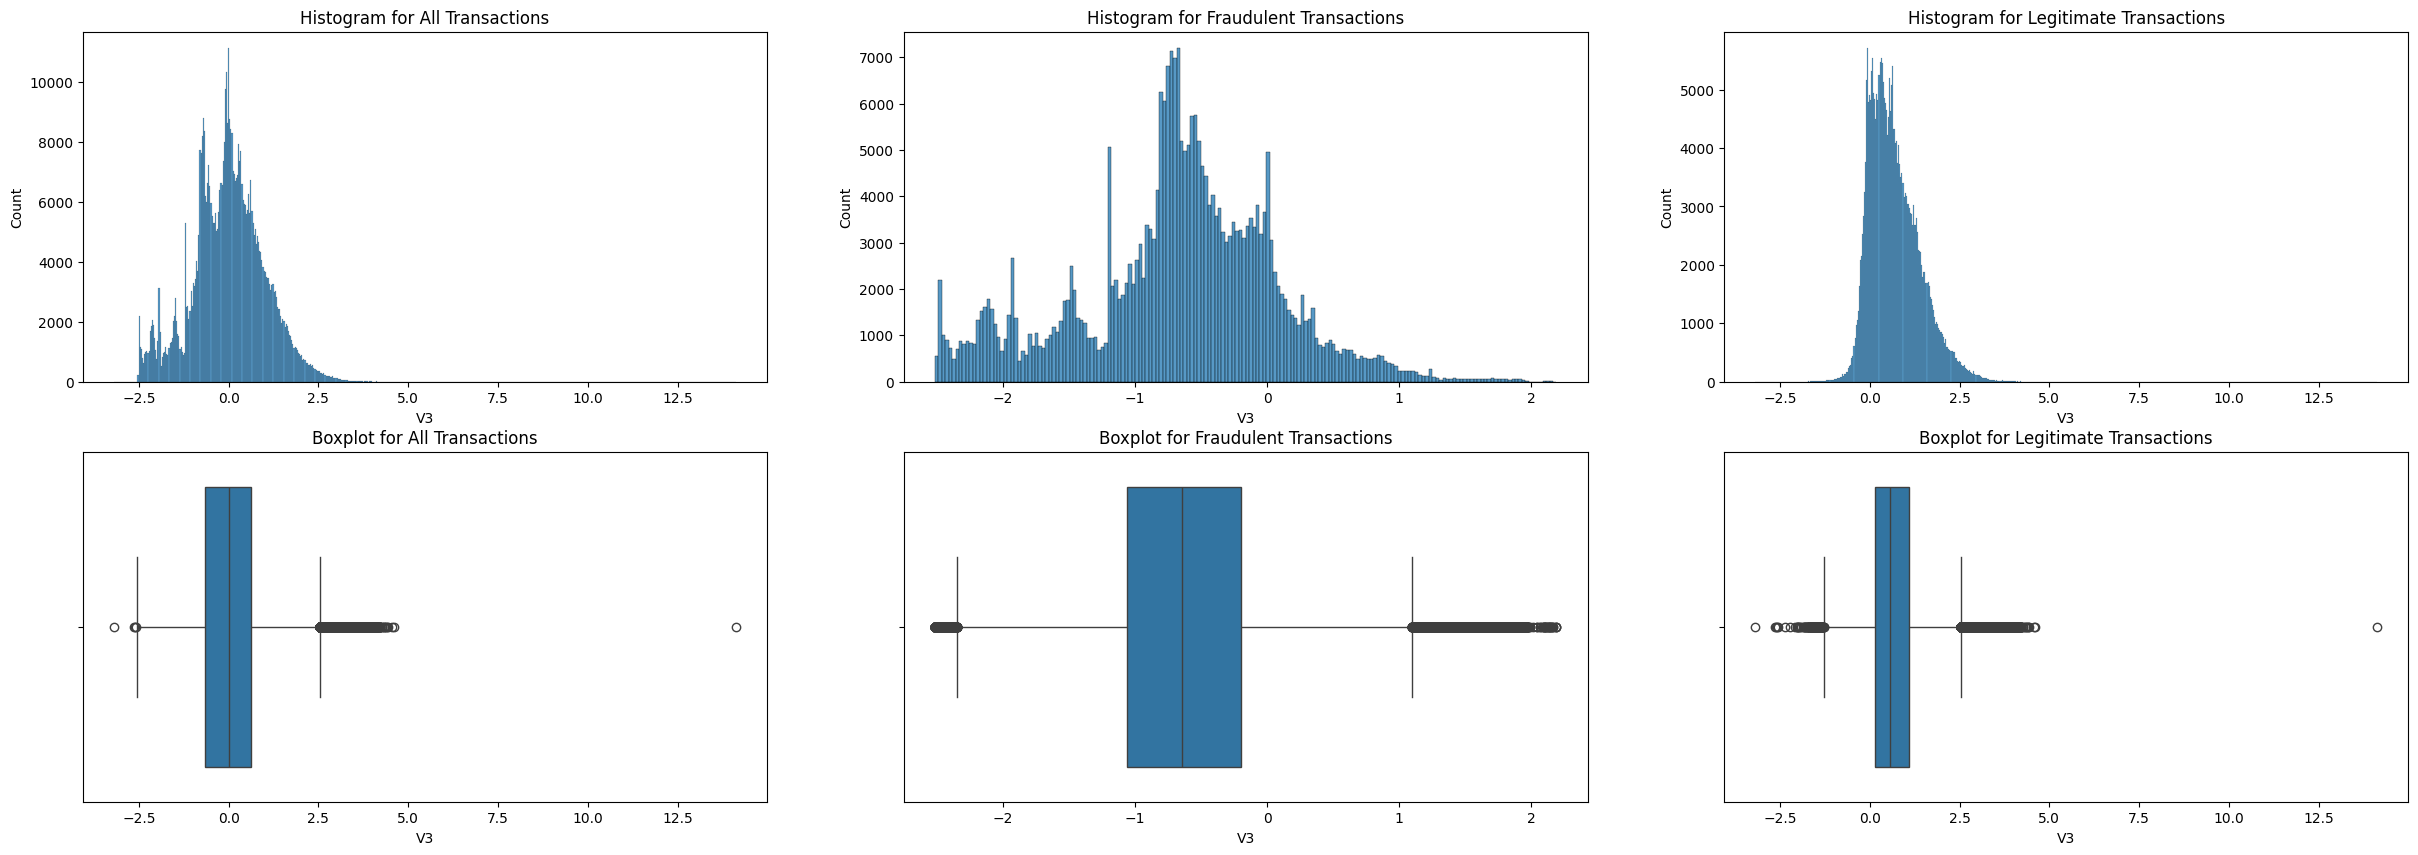

In [53]:
plot_hist_and_box(df,'V3')

### V4

We can assume from here on out that most of these are going to be close to Gaussian where the only changes necessary are either the use of log or exponentials. We will only write down any interesting observations that don't fit the prior description.

V4's fraudulent transactions do show a weird pattern where there are too many spikes in frequency for a Gaussian distribution to be blindly assumed. Either a transformation is in order, or something else has to be done

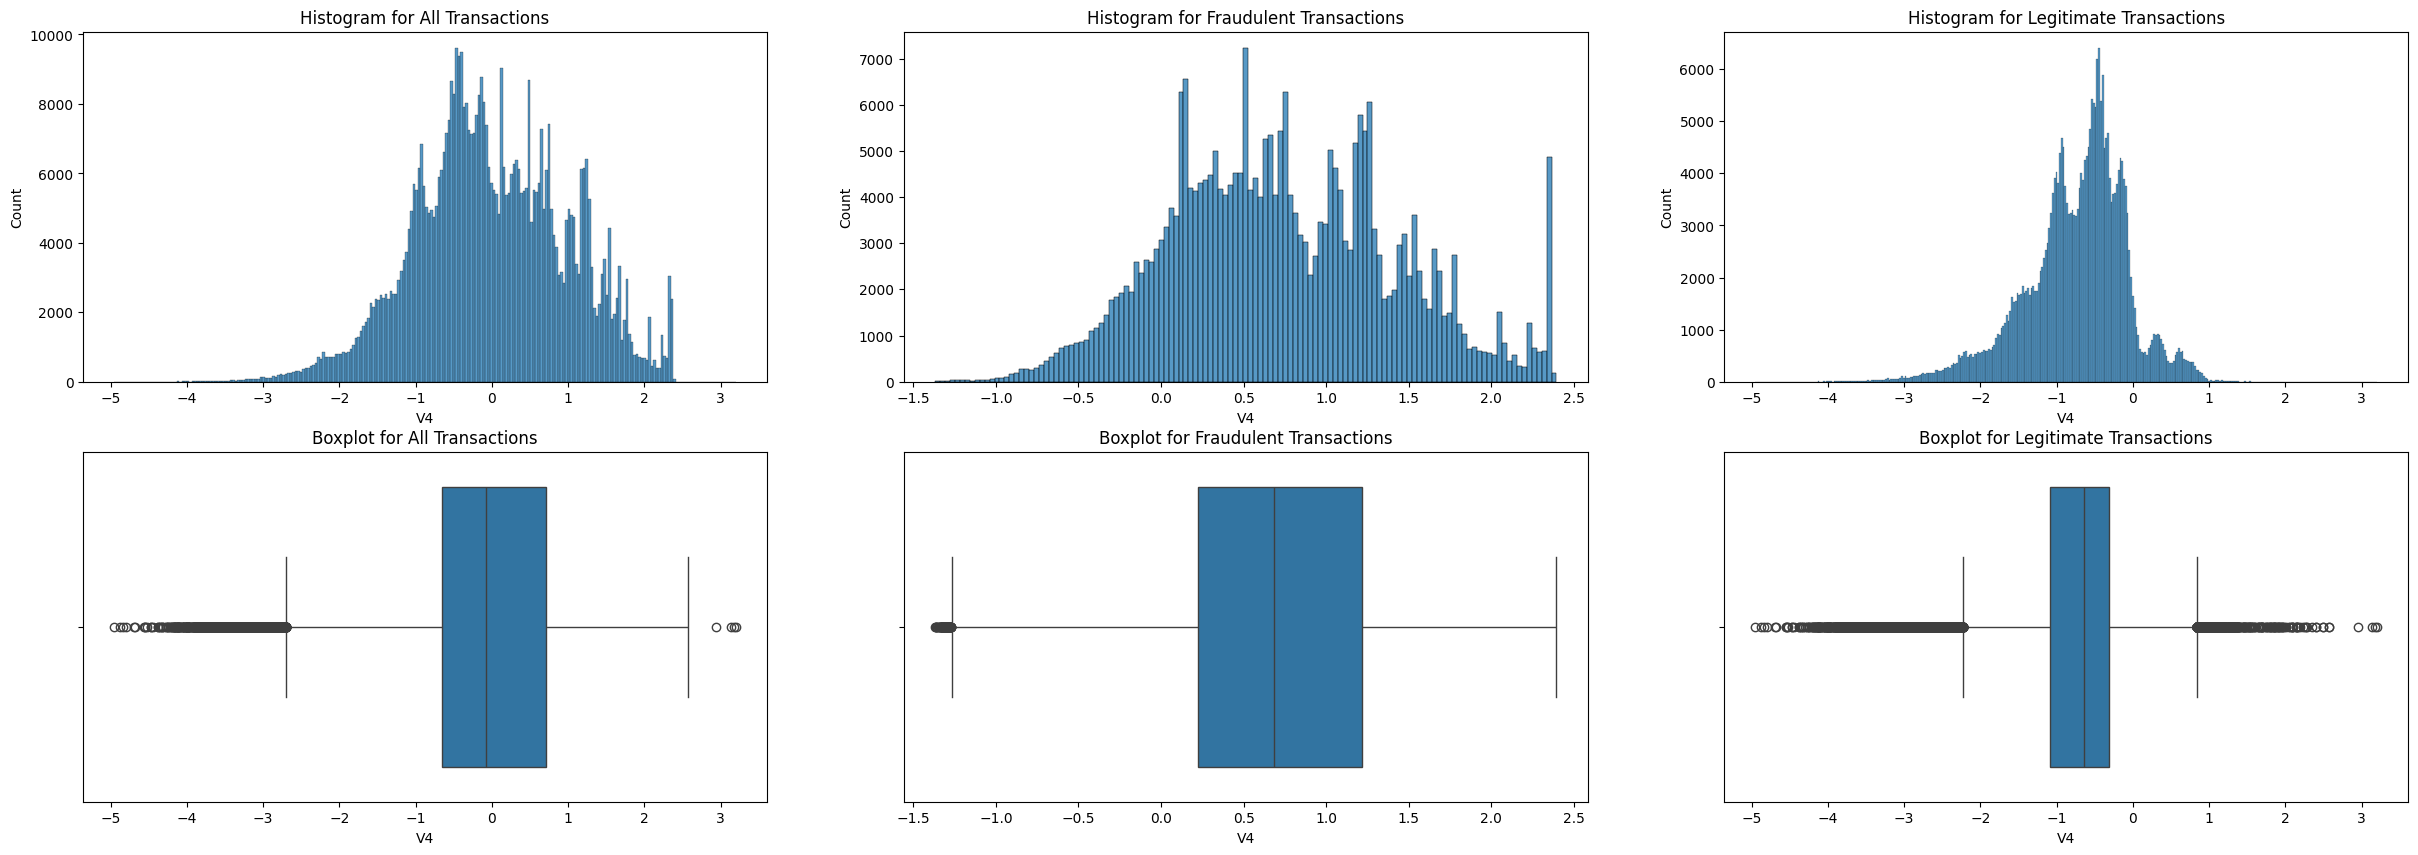

In [54]:
plot_hist_and_box(df,'V4')

### V5

Many outliers can be seen from the side of the legitimate transactions

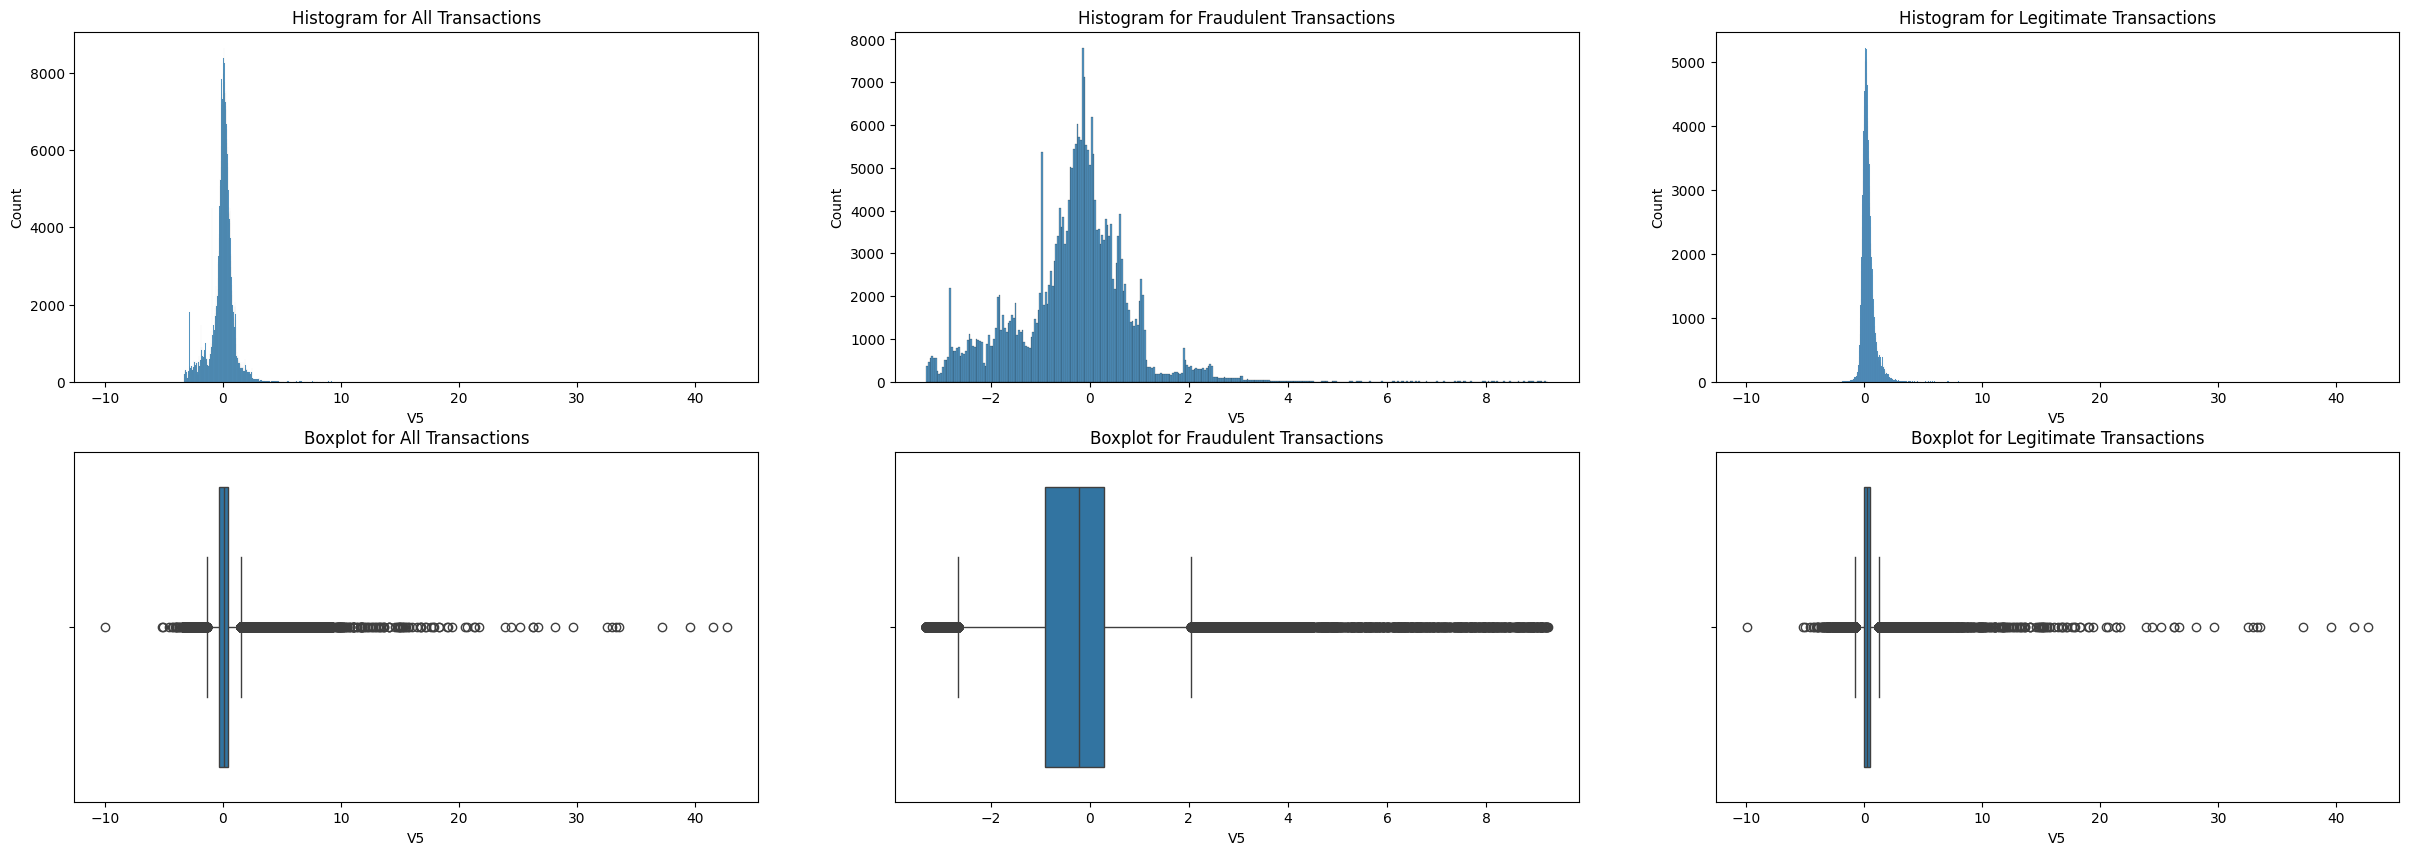

In [55]:
plot_hist_and_box(df,'V5')

### V6

The outliers for the legitimate transactions are spread out over both sides, which is interesting.

Additionally, there is a weird spike at the edge of the fraudulent transaction histogram

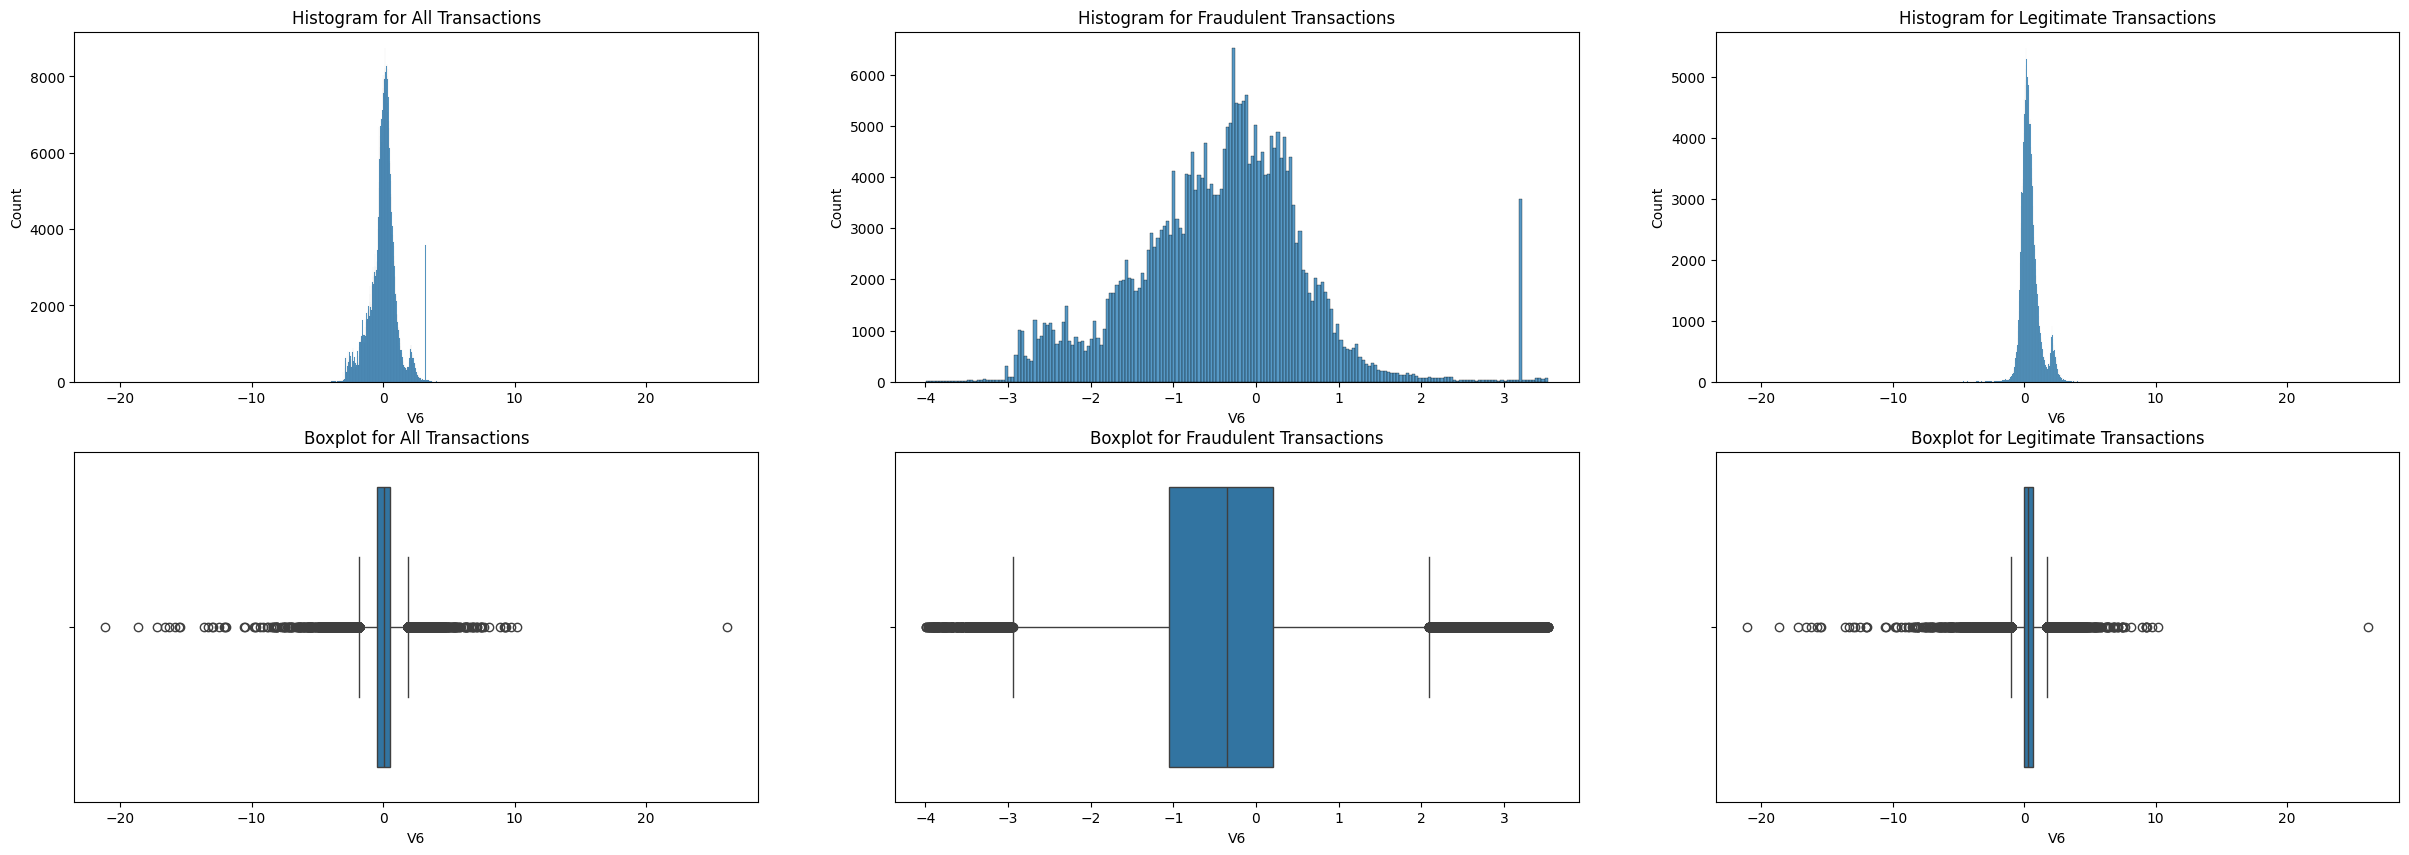

In [56]:
plot_hist_and_box(df,'V6')

### V7

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

New hypothesis: A singular point is causing all these problems for the legitimate transactions and removing it would siginificantly improve data visualization.

The hypothesis will be tested after all columns have been visualized first.

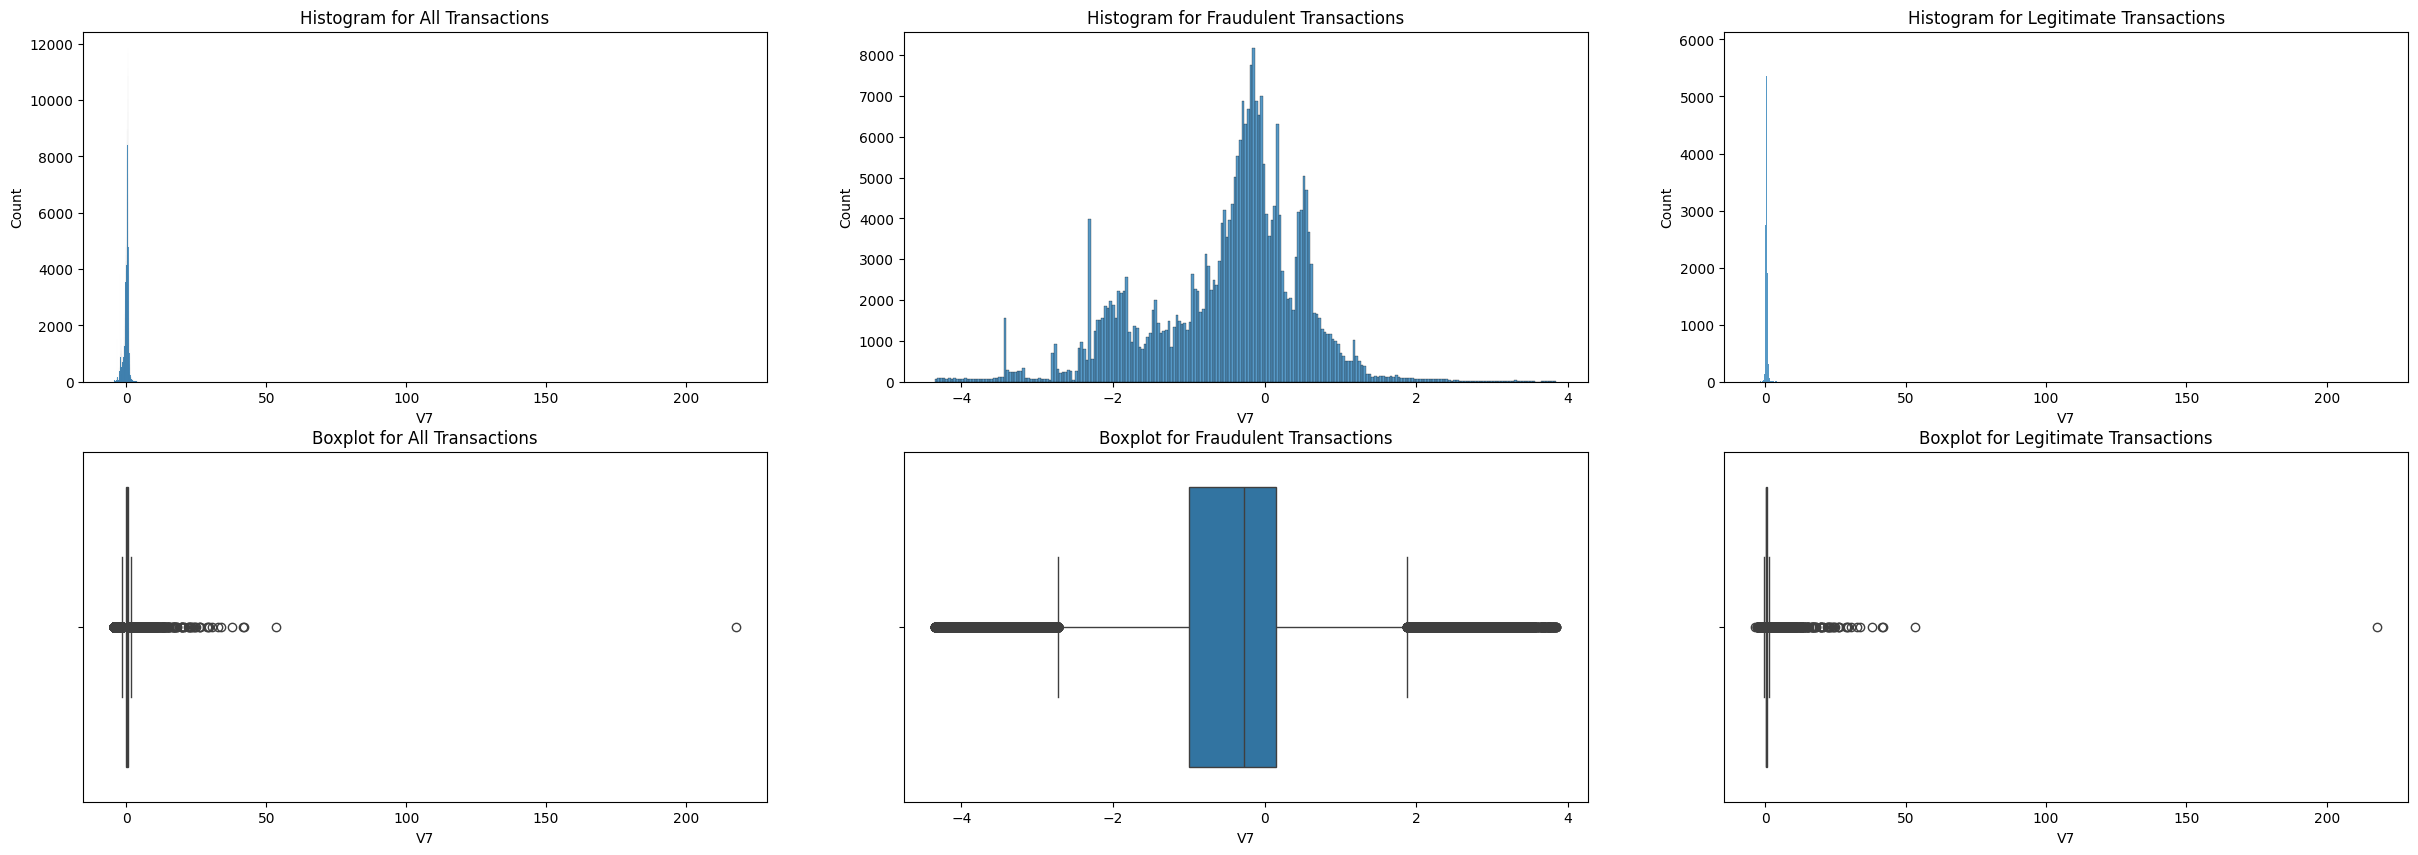

In [57]:
plot_hist_and_box(df,'V7')

### V8

Outliers aside, this is a narow, yet very close fit to Gaussian distribution throughout.

Also the outliers this time are almost equally as plentiful in both fraudulent and legitimate transactions.

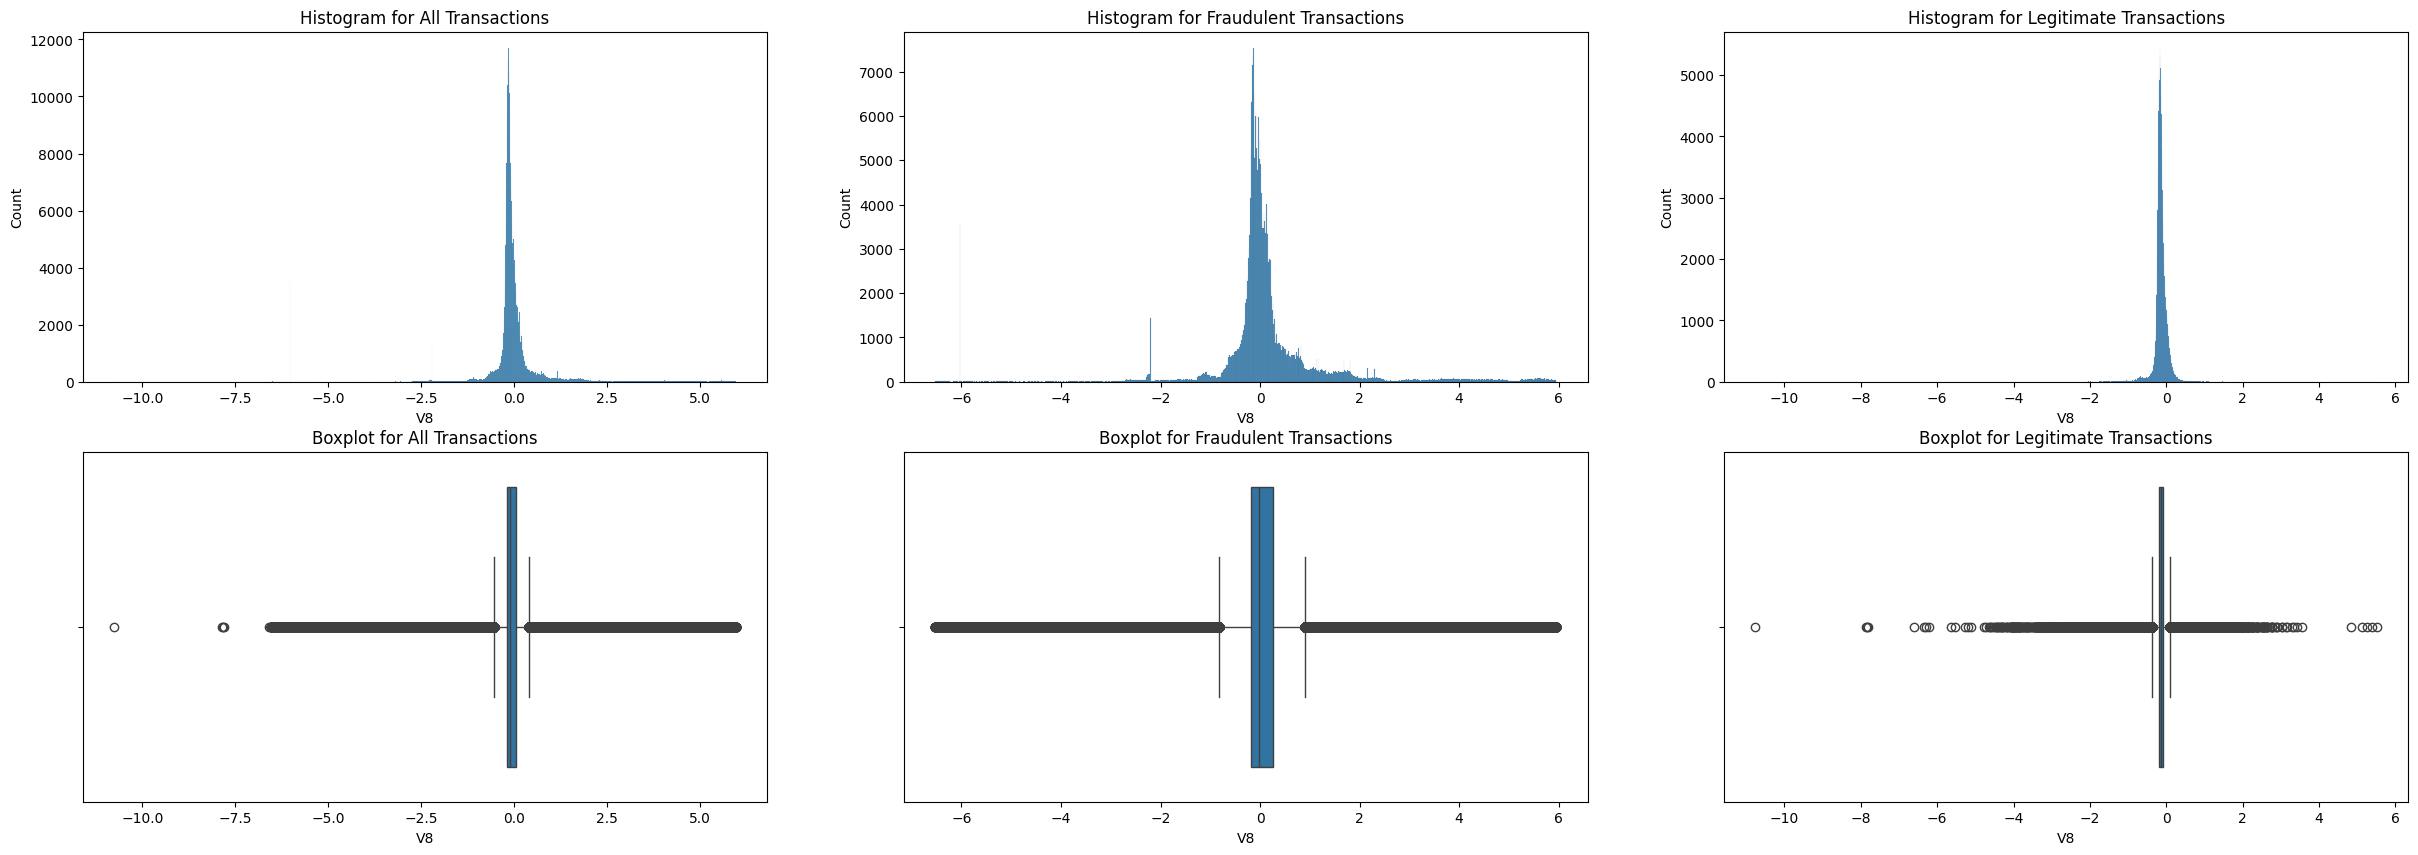

In [58]:
plot_hist_and_box(df,'V8')

### V9

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

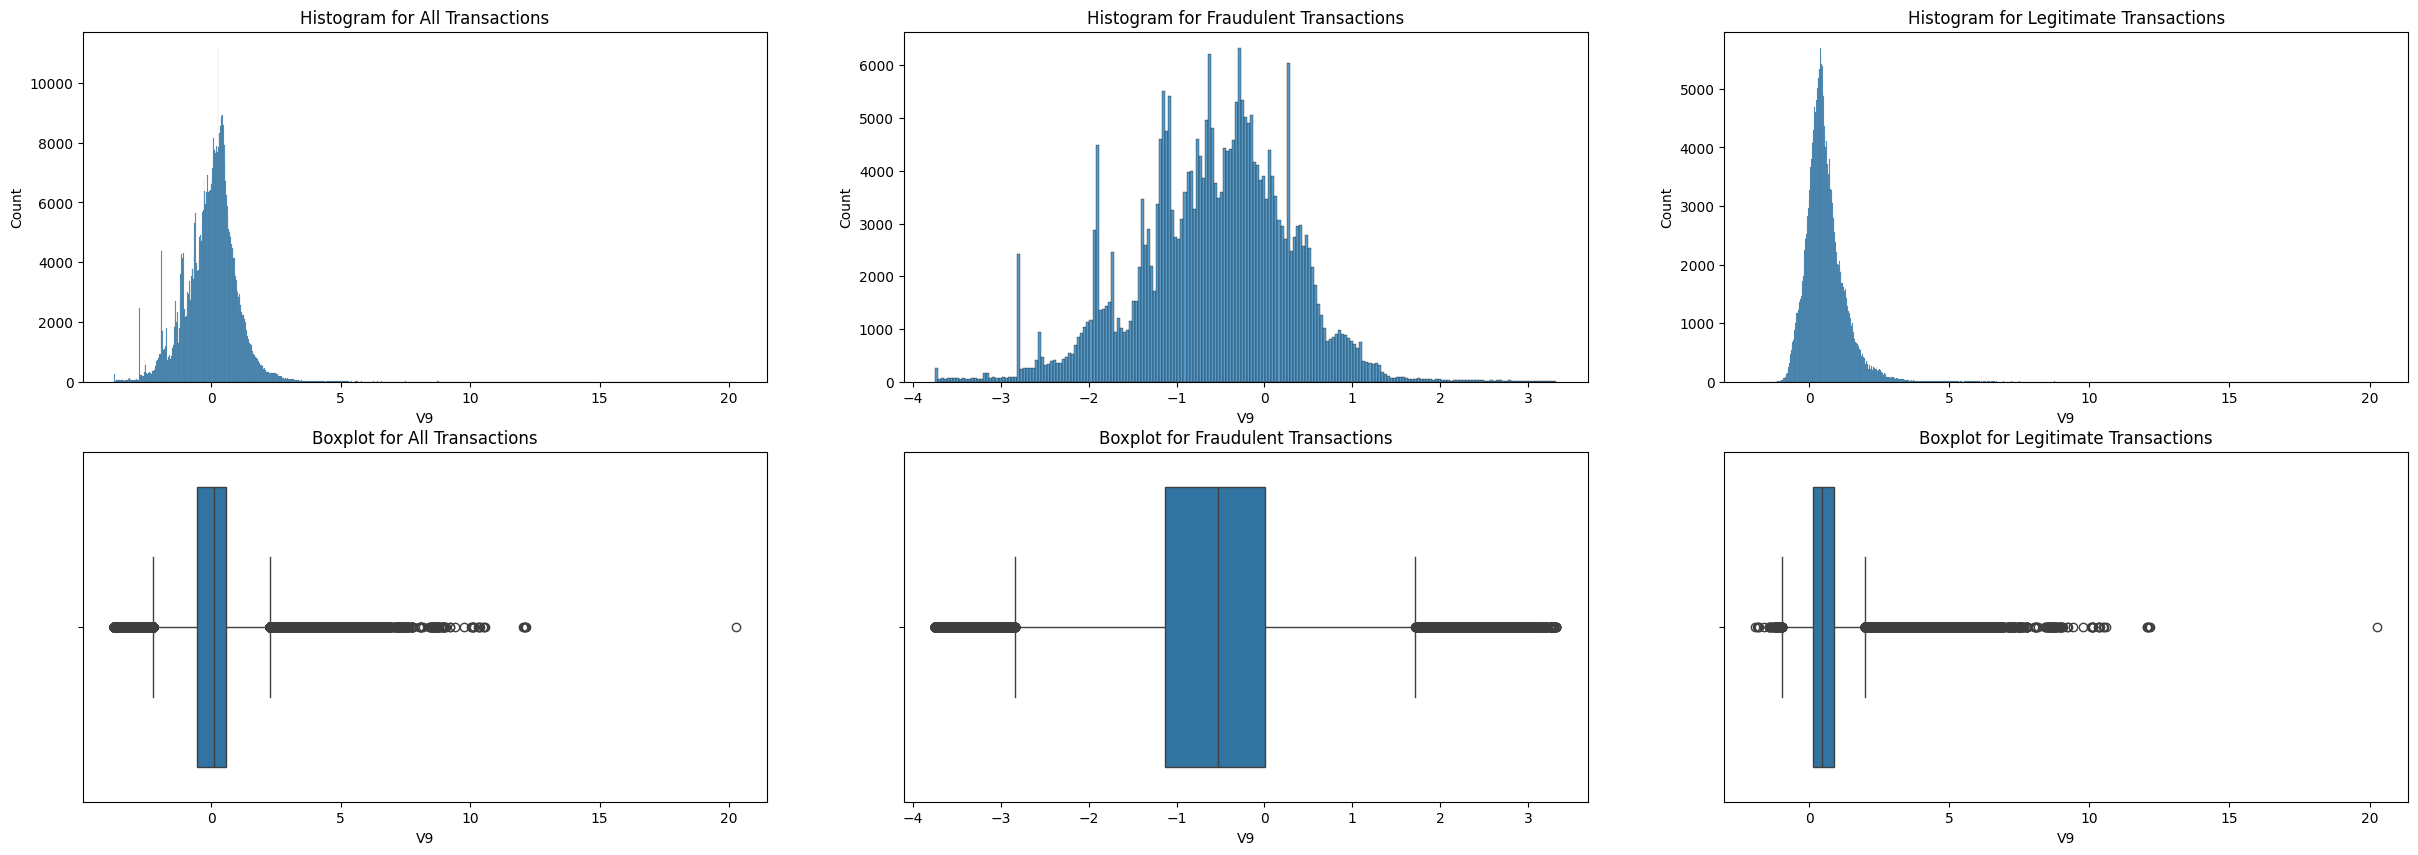

In [59]:
plot_hist_and_box(df,'V9')

### V10

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

There are also interesting dips in the fraudulent transaction histogram, further consideration may be necessary

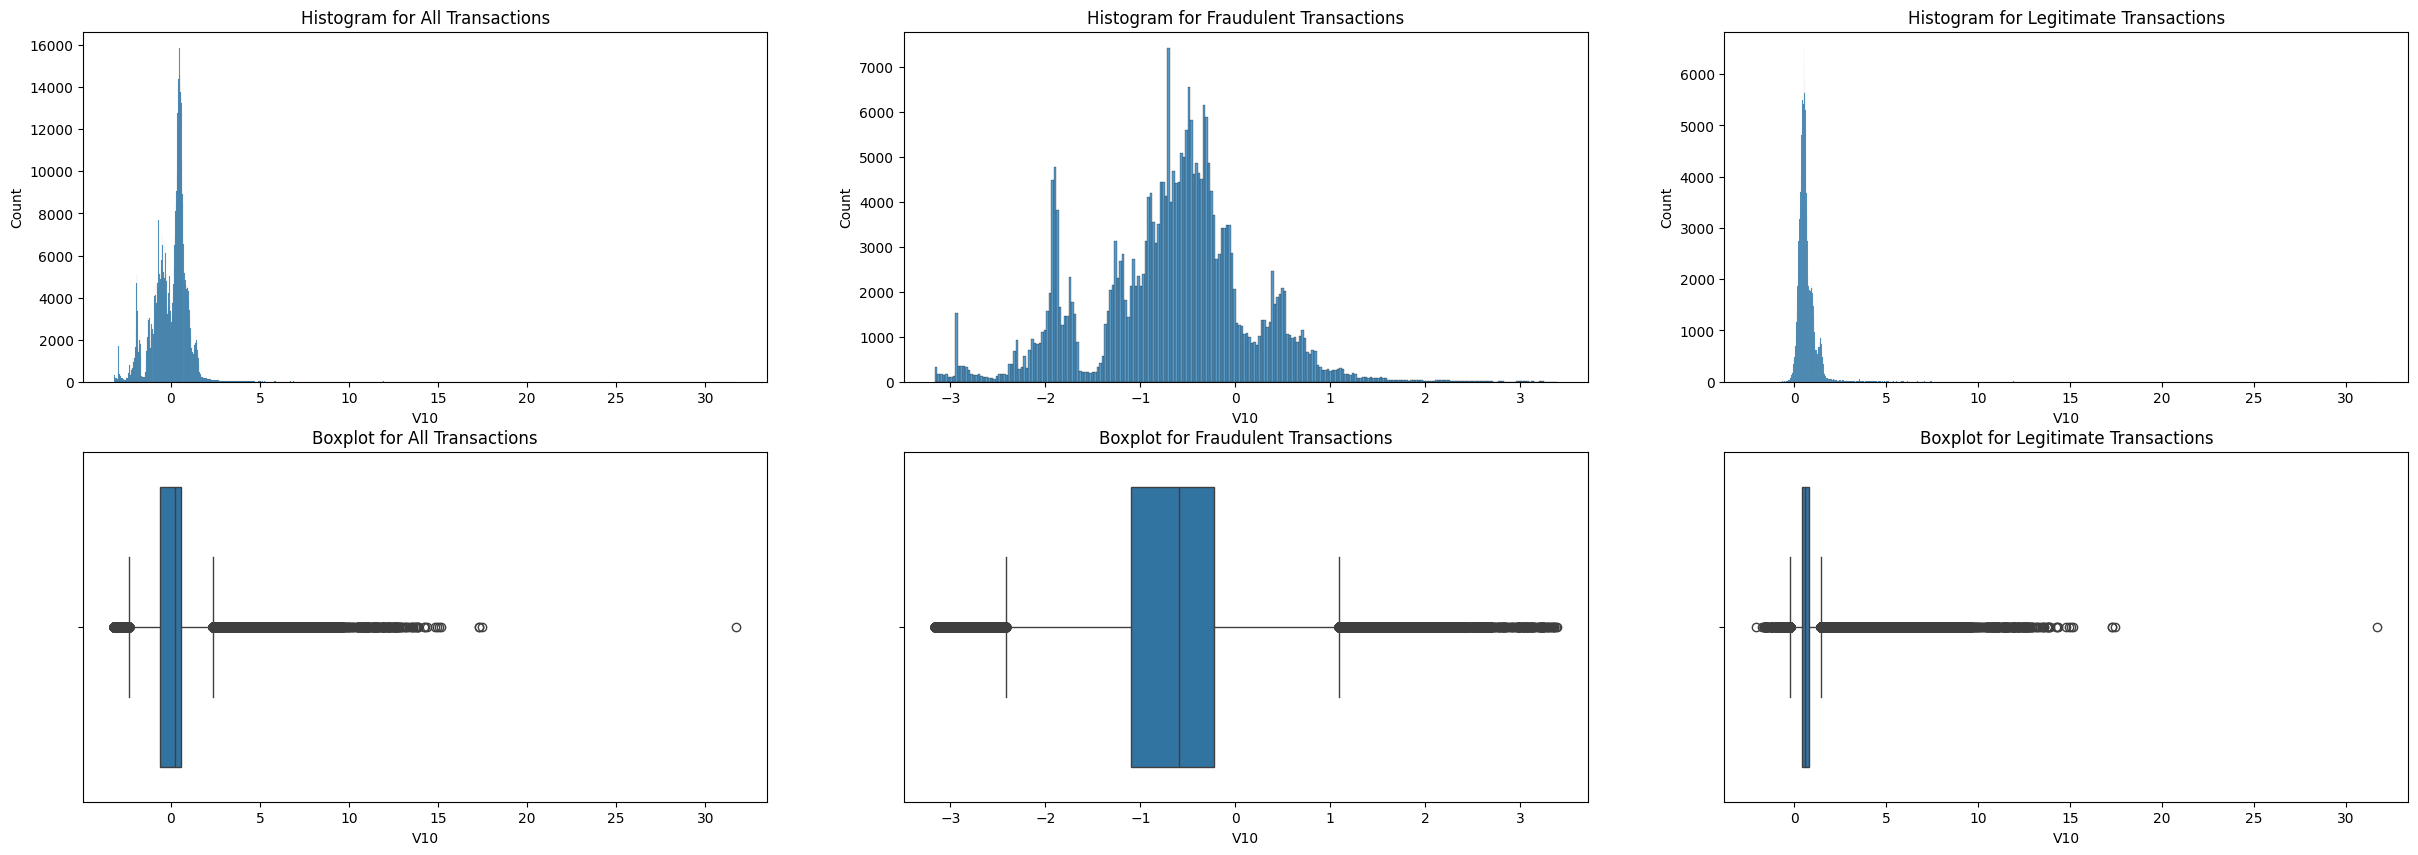

In [60]:
plot_hist_and_box(df,'V10')

### V11

The shape here is more interesting than usual since the curve is far less steep than the prior columns.

The spike present in fraudulent transactions should still be noted

One side of the legitimate transactions histogram is much steeper than the other

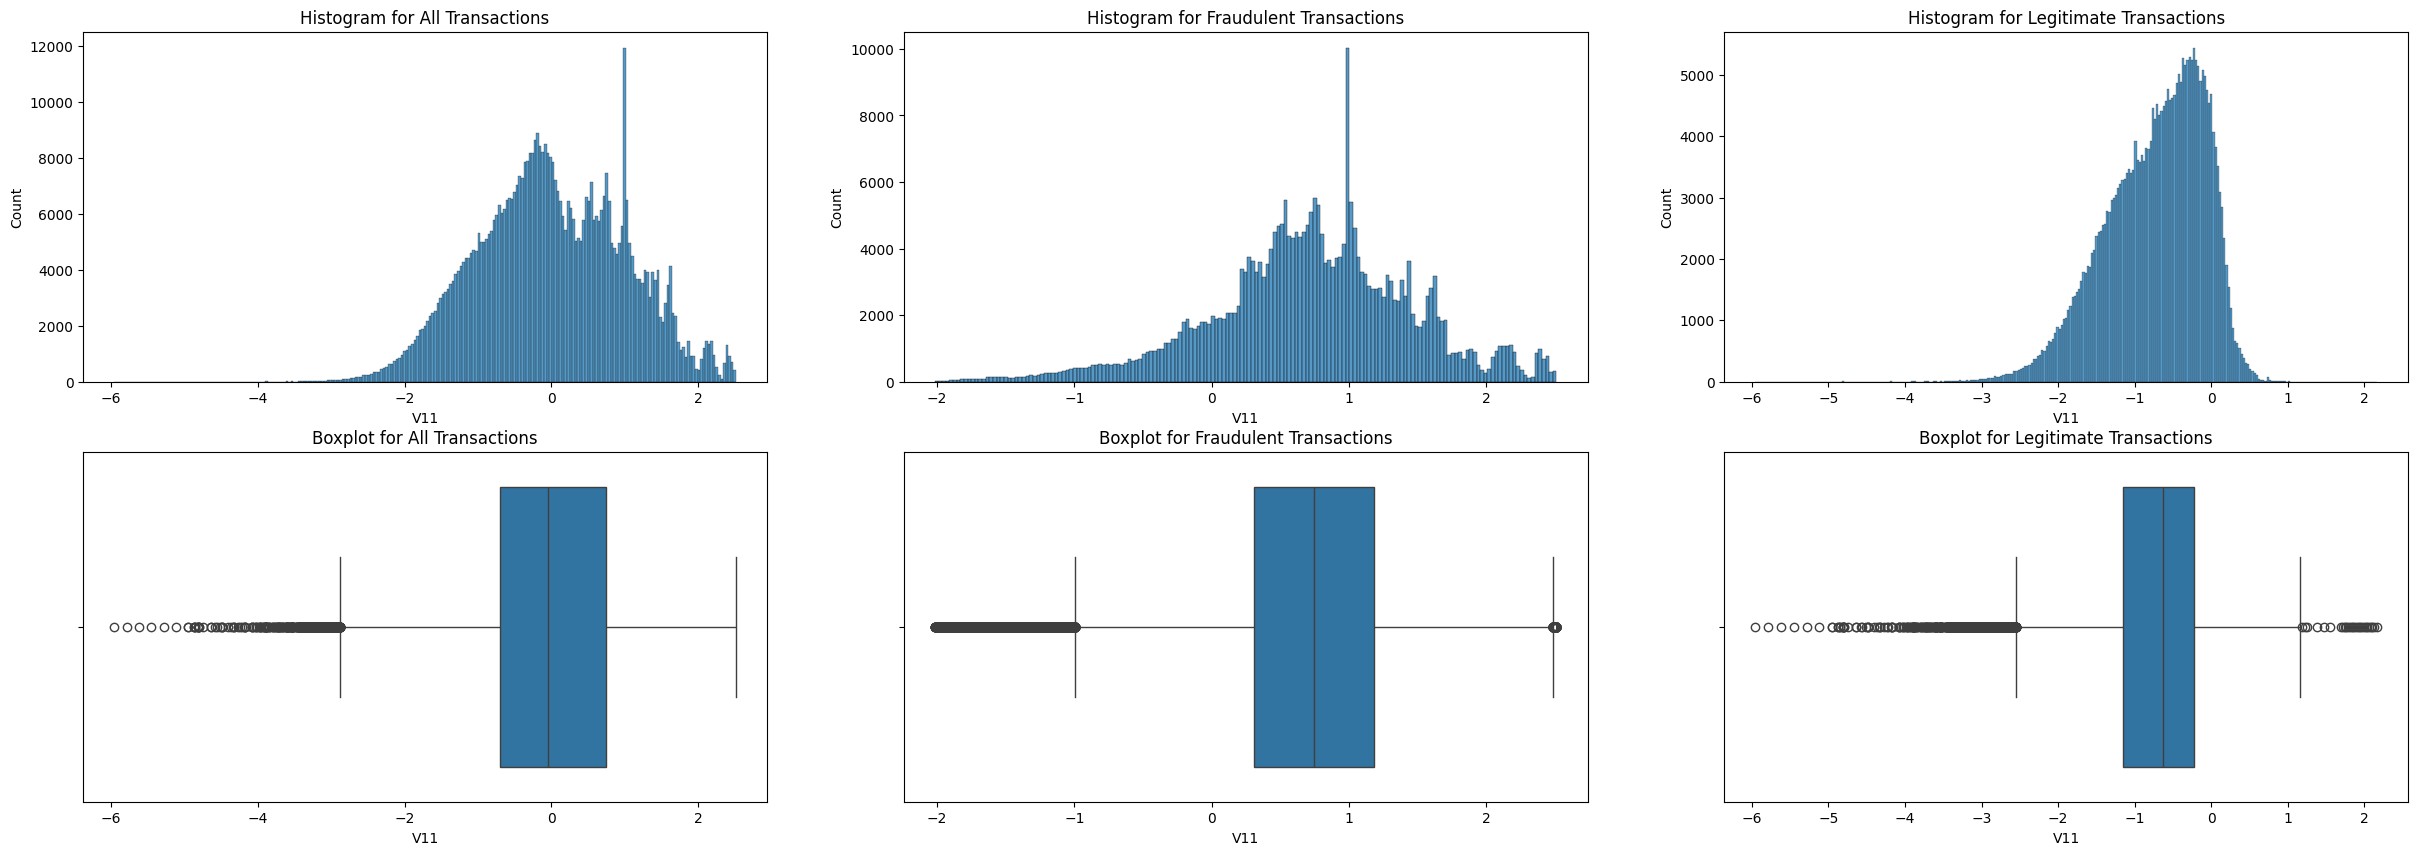

In [61]:
plot_hist_and_box(df,'V11')

### V12

The dips and spikes from fraudulent transactions prevent us from calling it Gaussian, and the effect extends to the overall column since there is a sharp dip in the middle that prevents us from calling it Gaussian

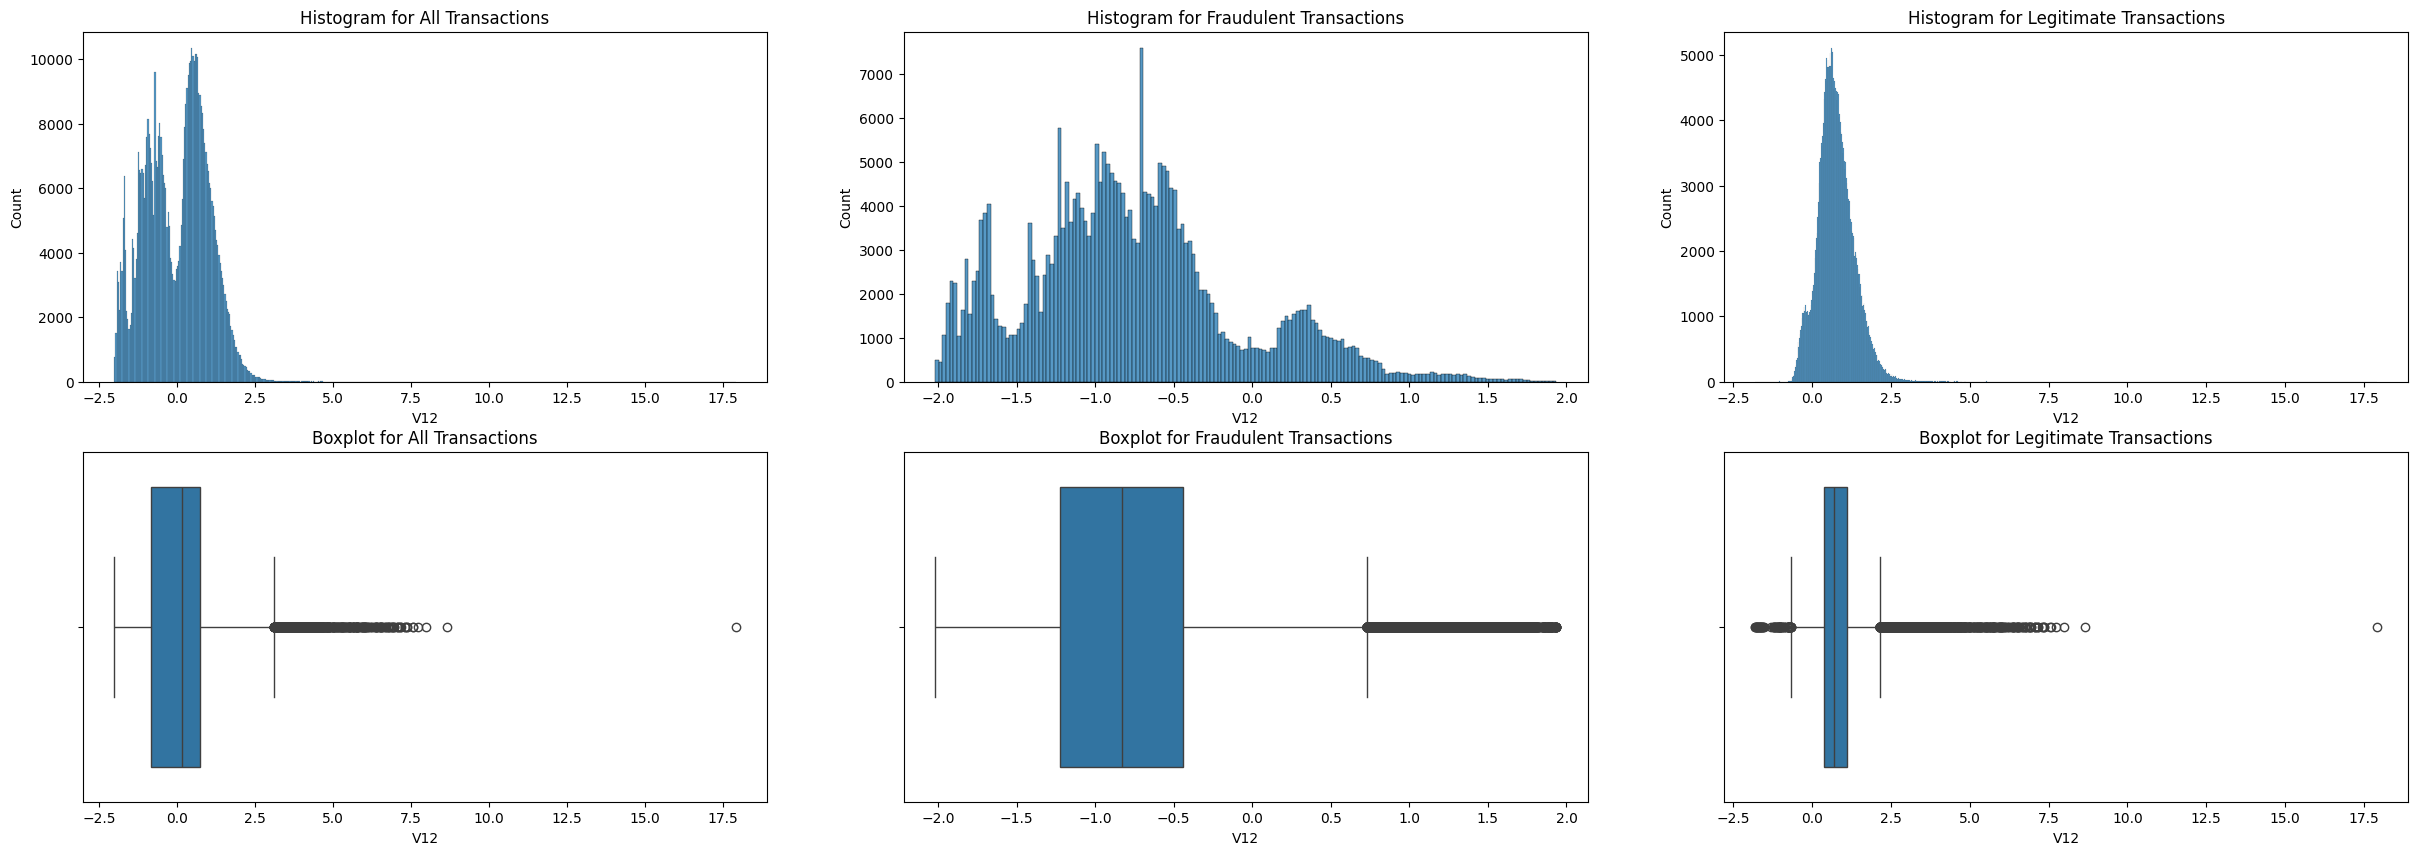

In [62]:
plot_hist_and_box(df,'V12')

### V13

Significantly better than before with almost everything being close to perfectly Gaussian

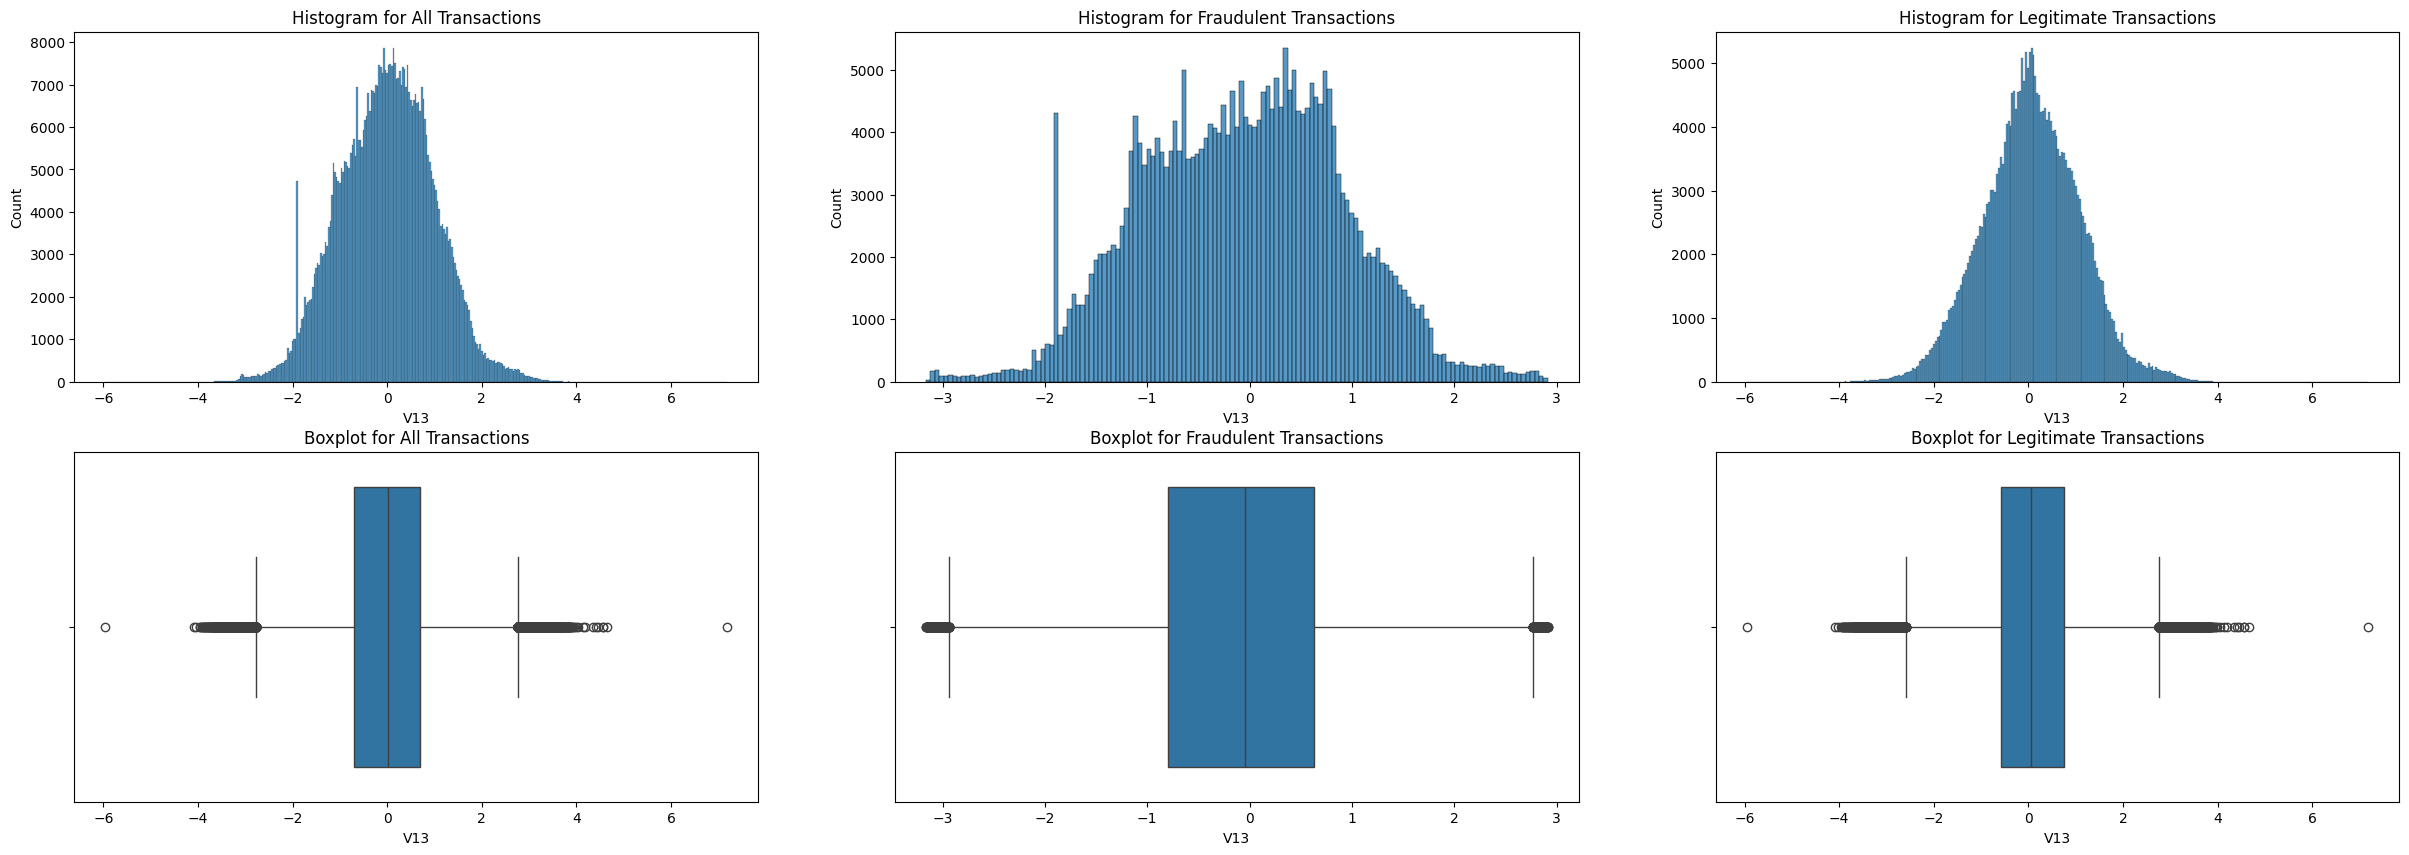

In [63]:
plot_hist_and_box(df,'V13')

### V14

The problem with the overall column is similar of that of V12 despite the fraudulent and legitimate transactions being almost Gaussian individually.

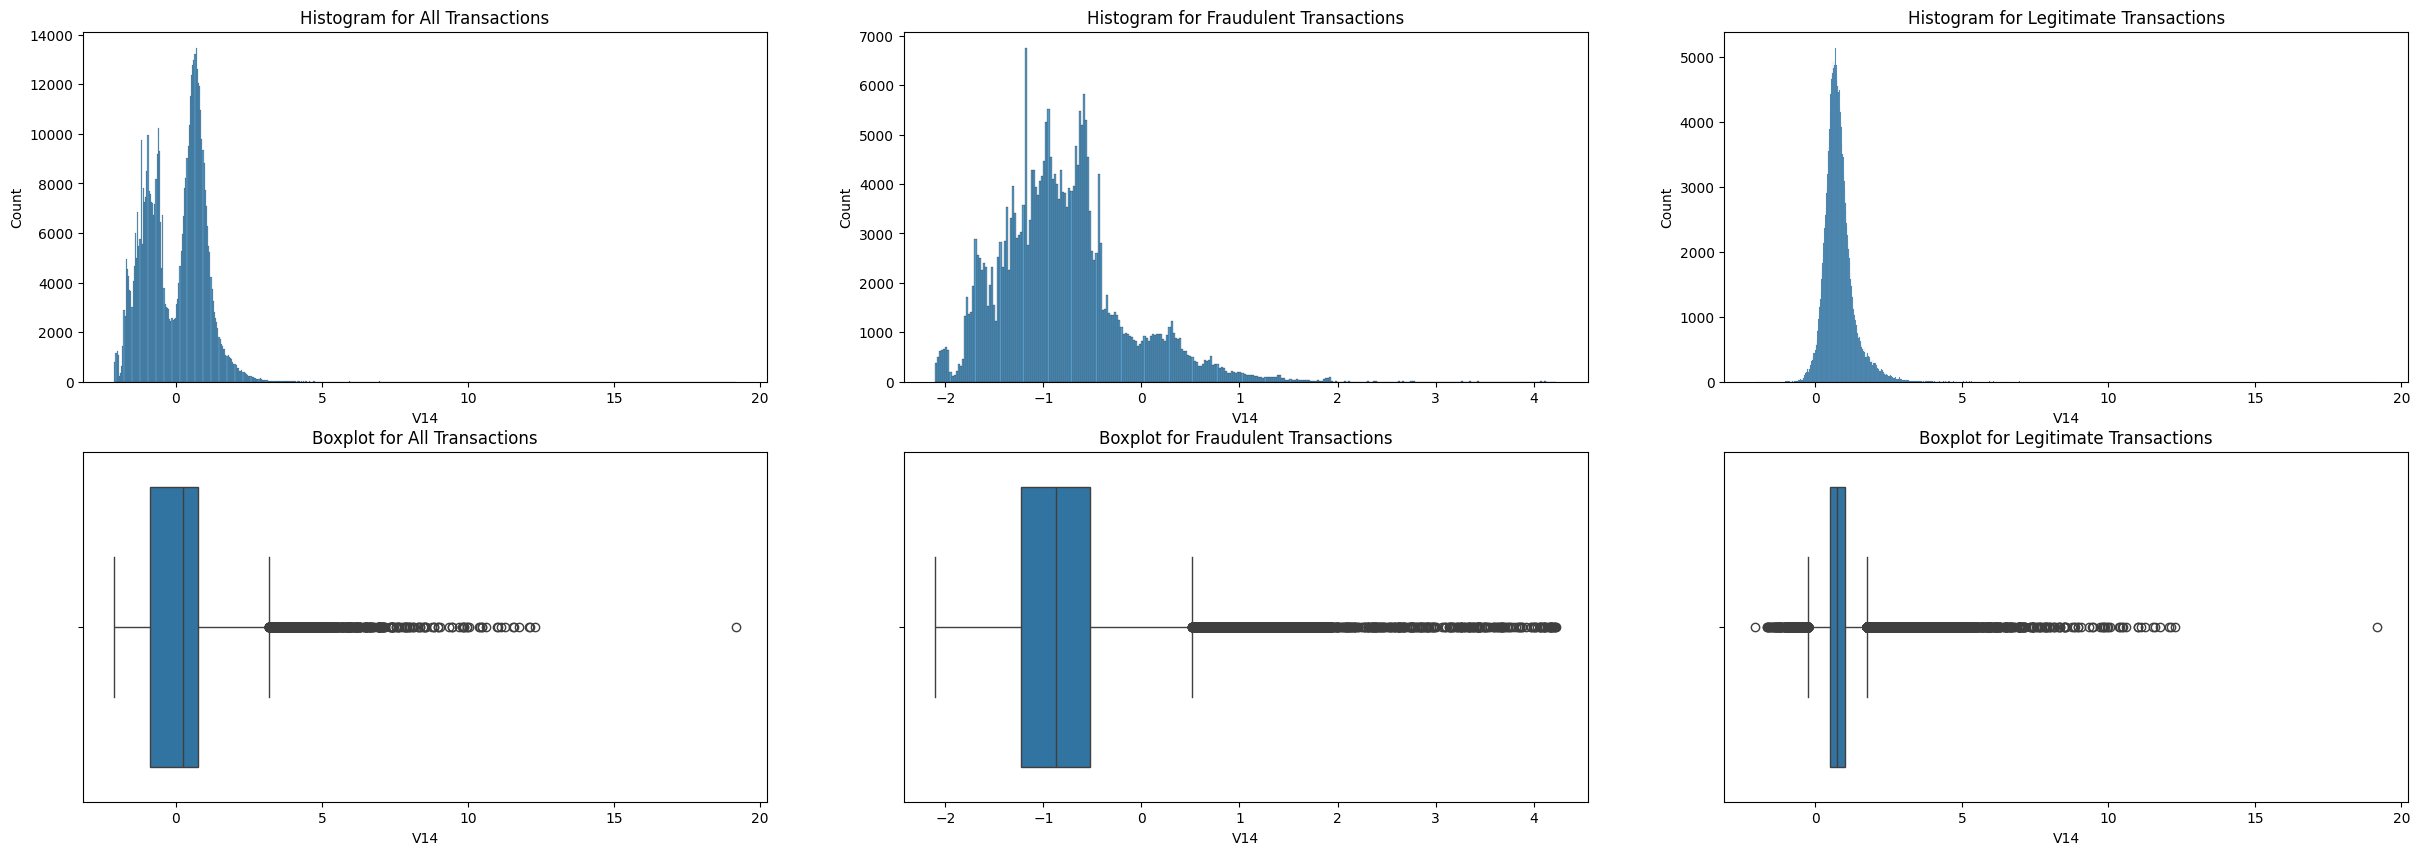

In [64]:
plot_hist_and_box(df,'V14')

### V15

Mostly Gaussian even when considering outliers

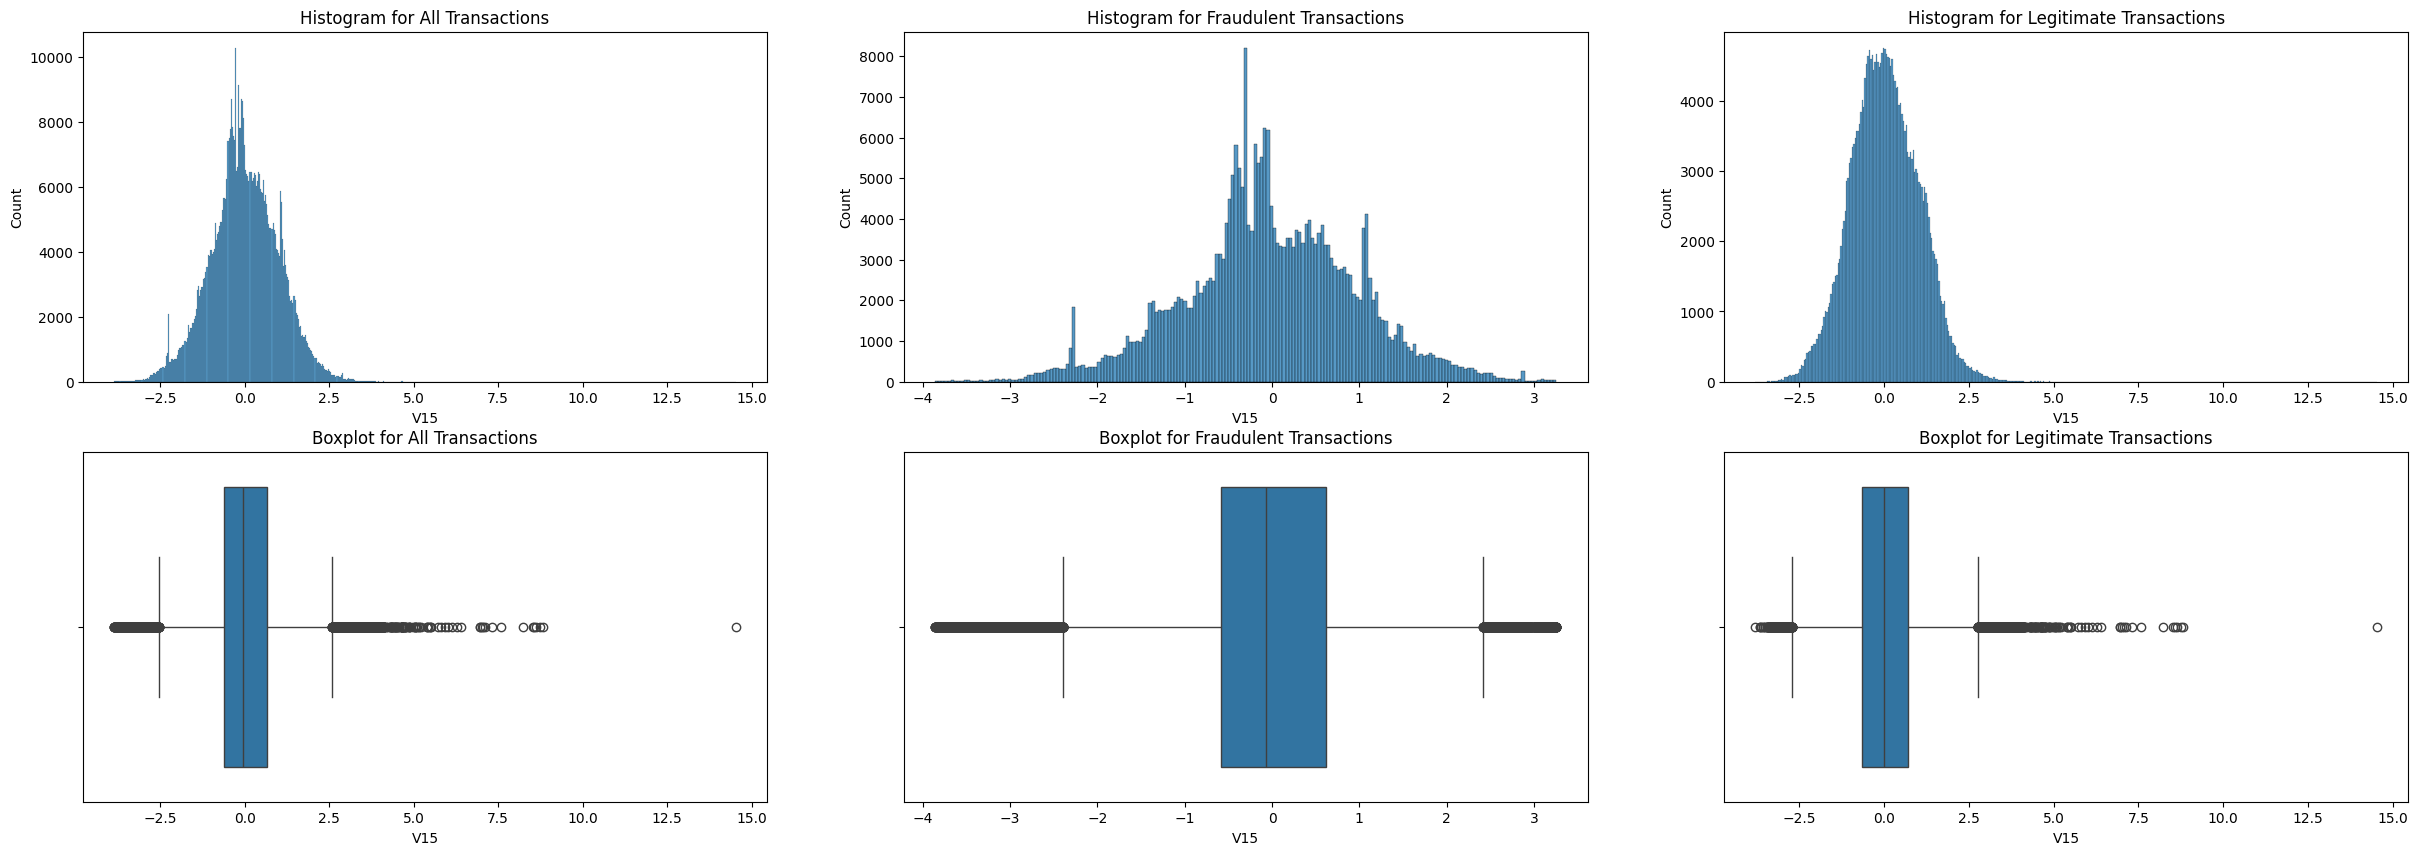

In [66]:
plot_hist_and_box(df,'V15')

### V16

The only non-Gaussian thing here is the fraudulent transactions (possibly due to high density and large number of outliers)

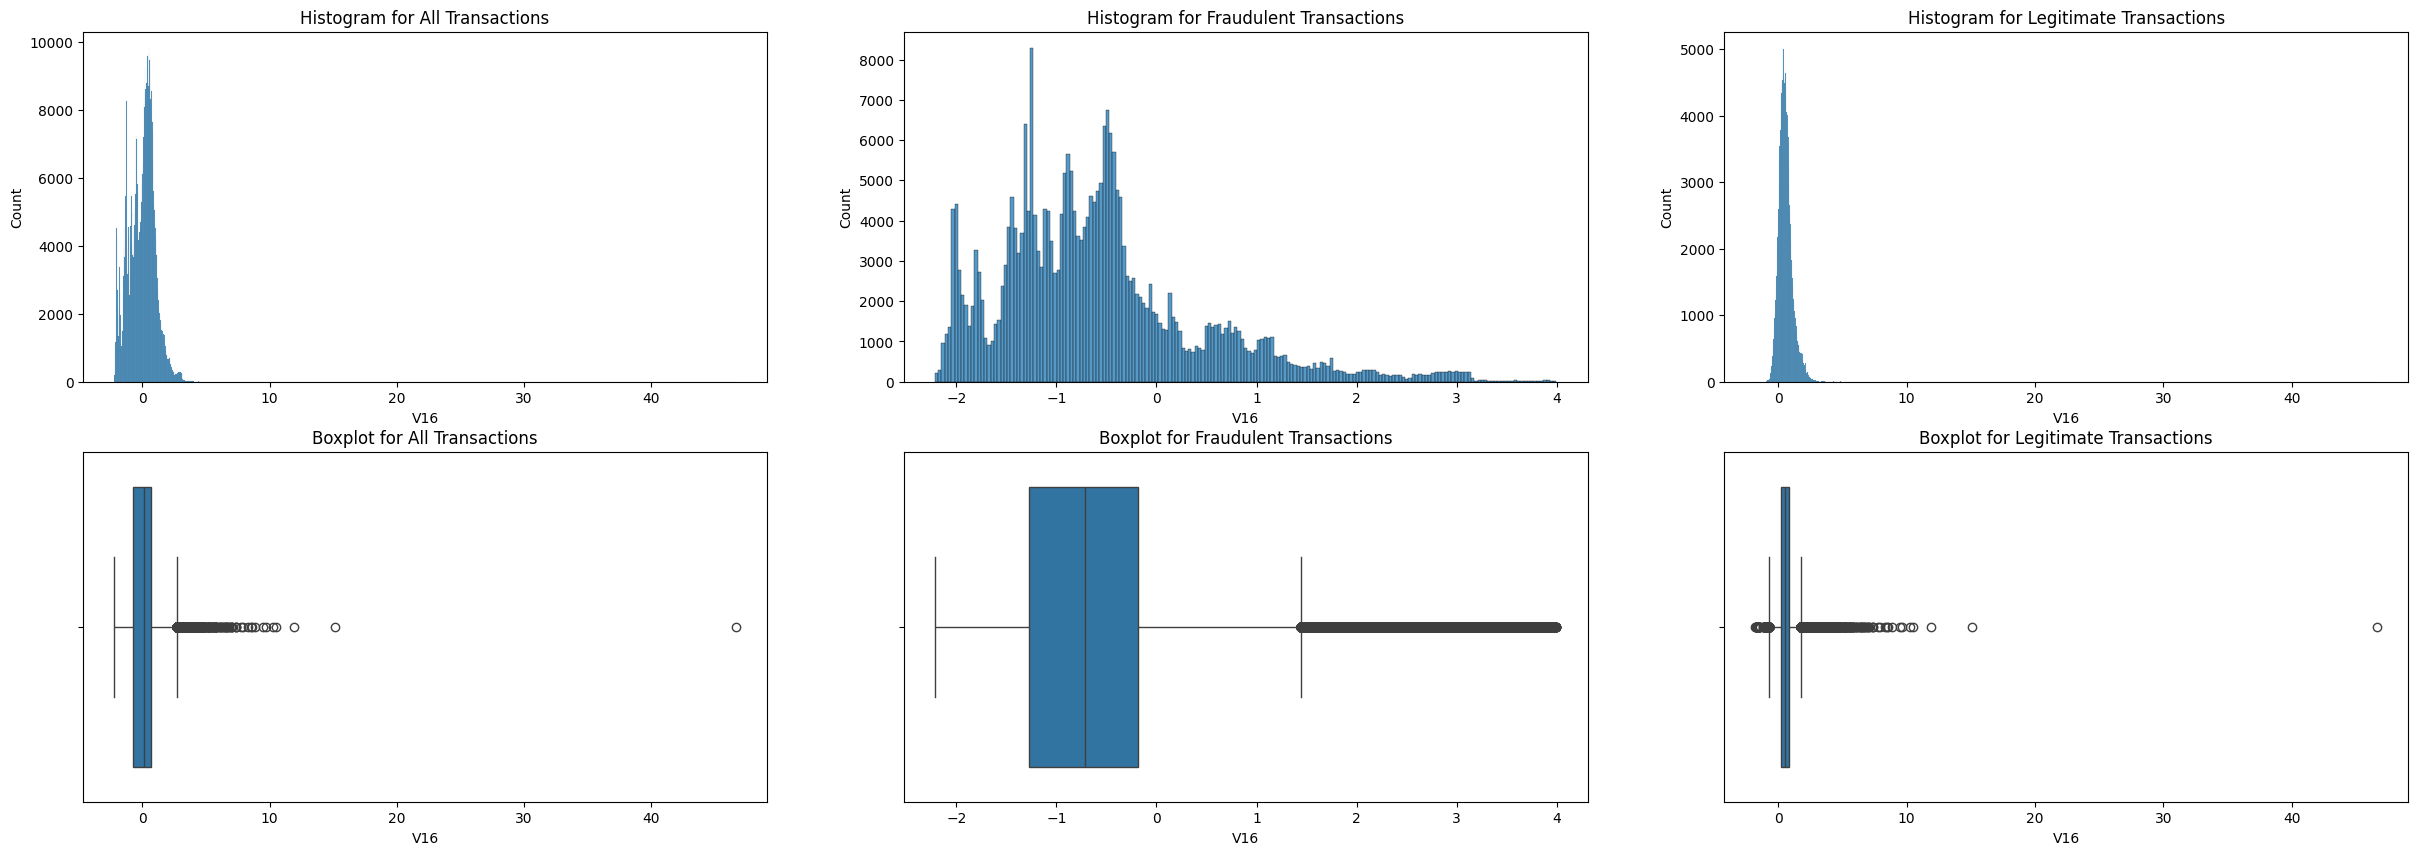

In [67]:
plot_hist_and_box(df,'V16')

### V17

Ok, now only the legitimate transactions are Gaussian

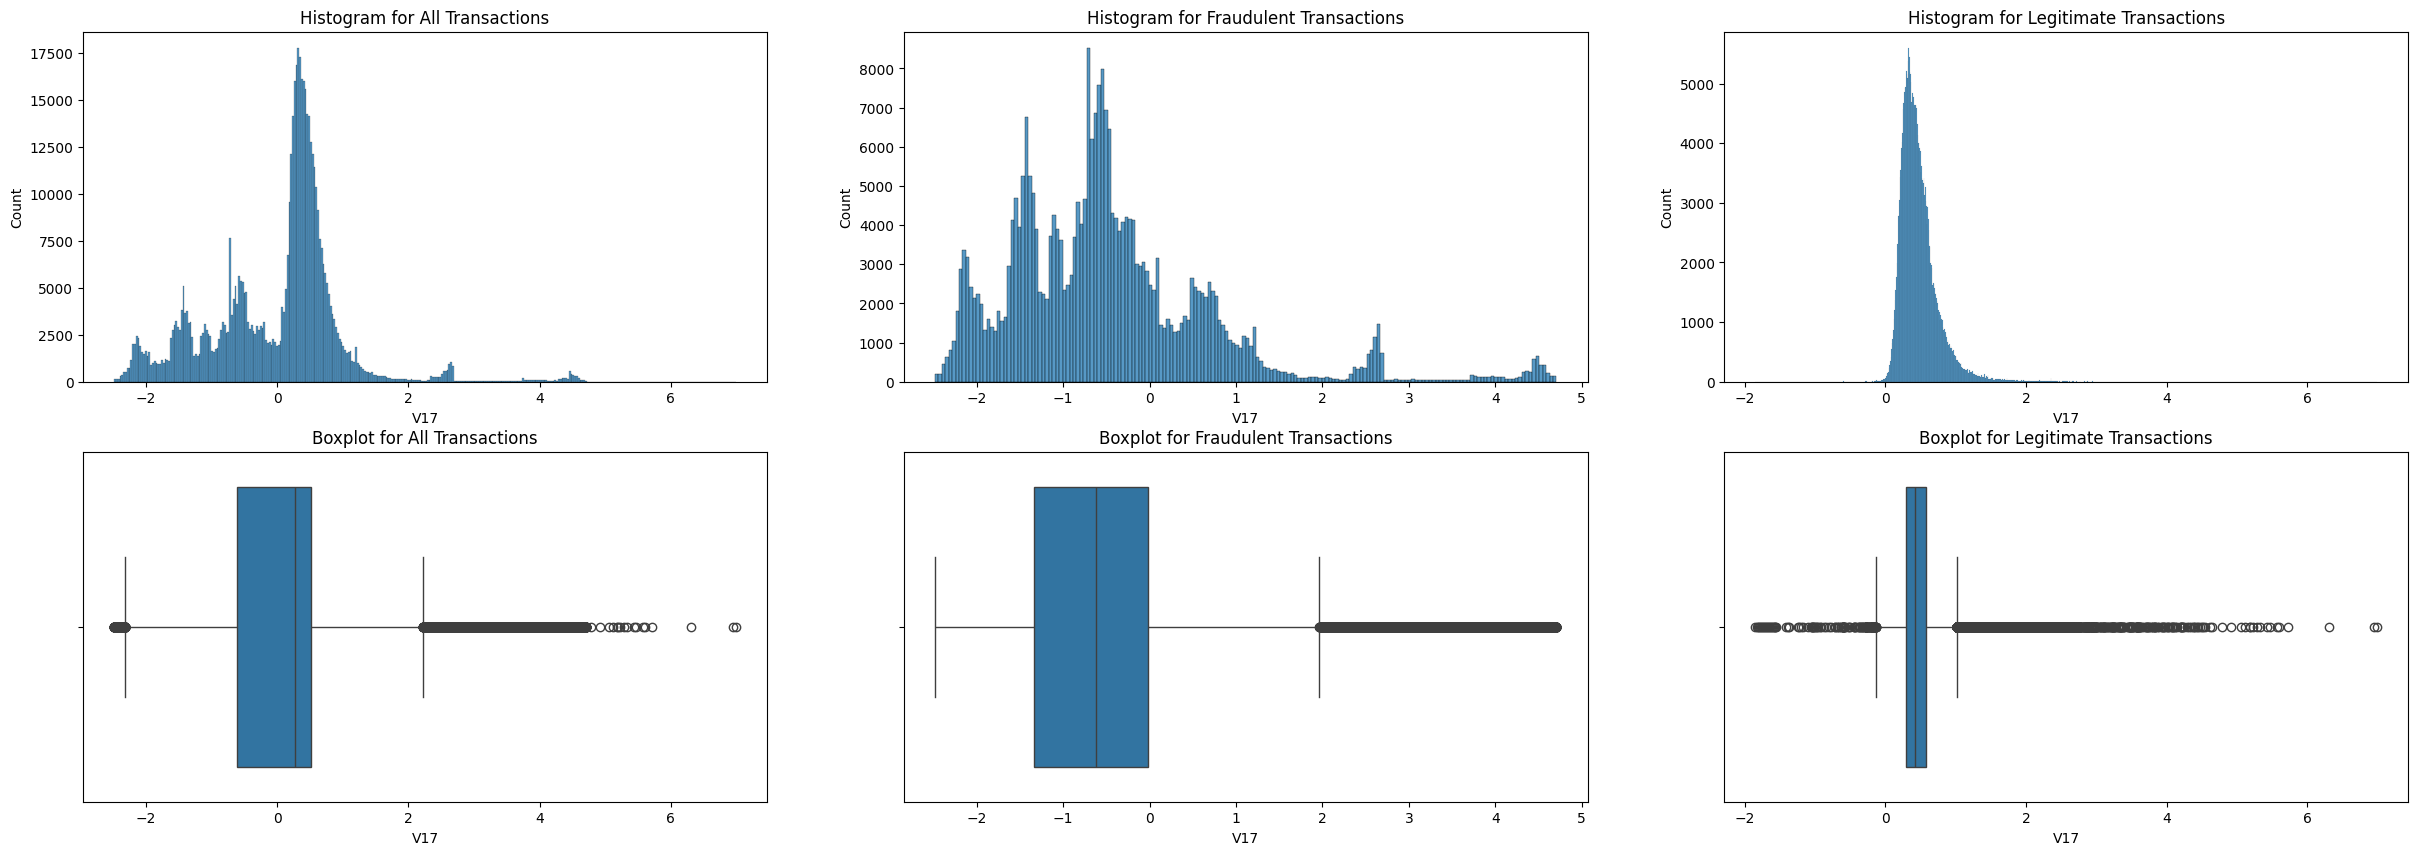

In [68]:
plot_hist_and_box(df,'V17')

### V18

Better than 17, but fraudulent transactions are not Gaussian

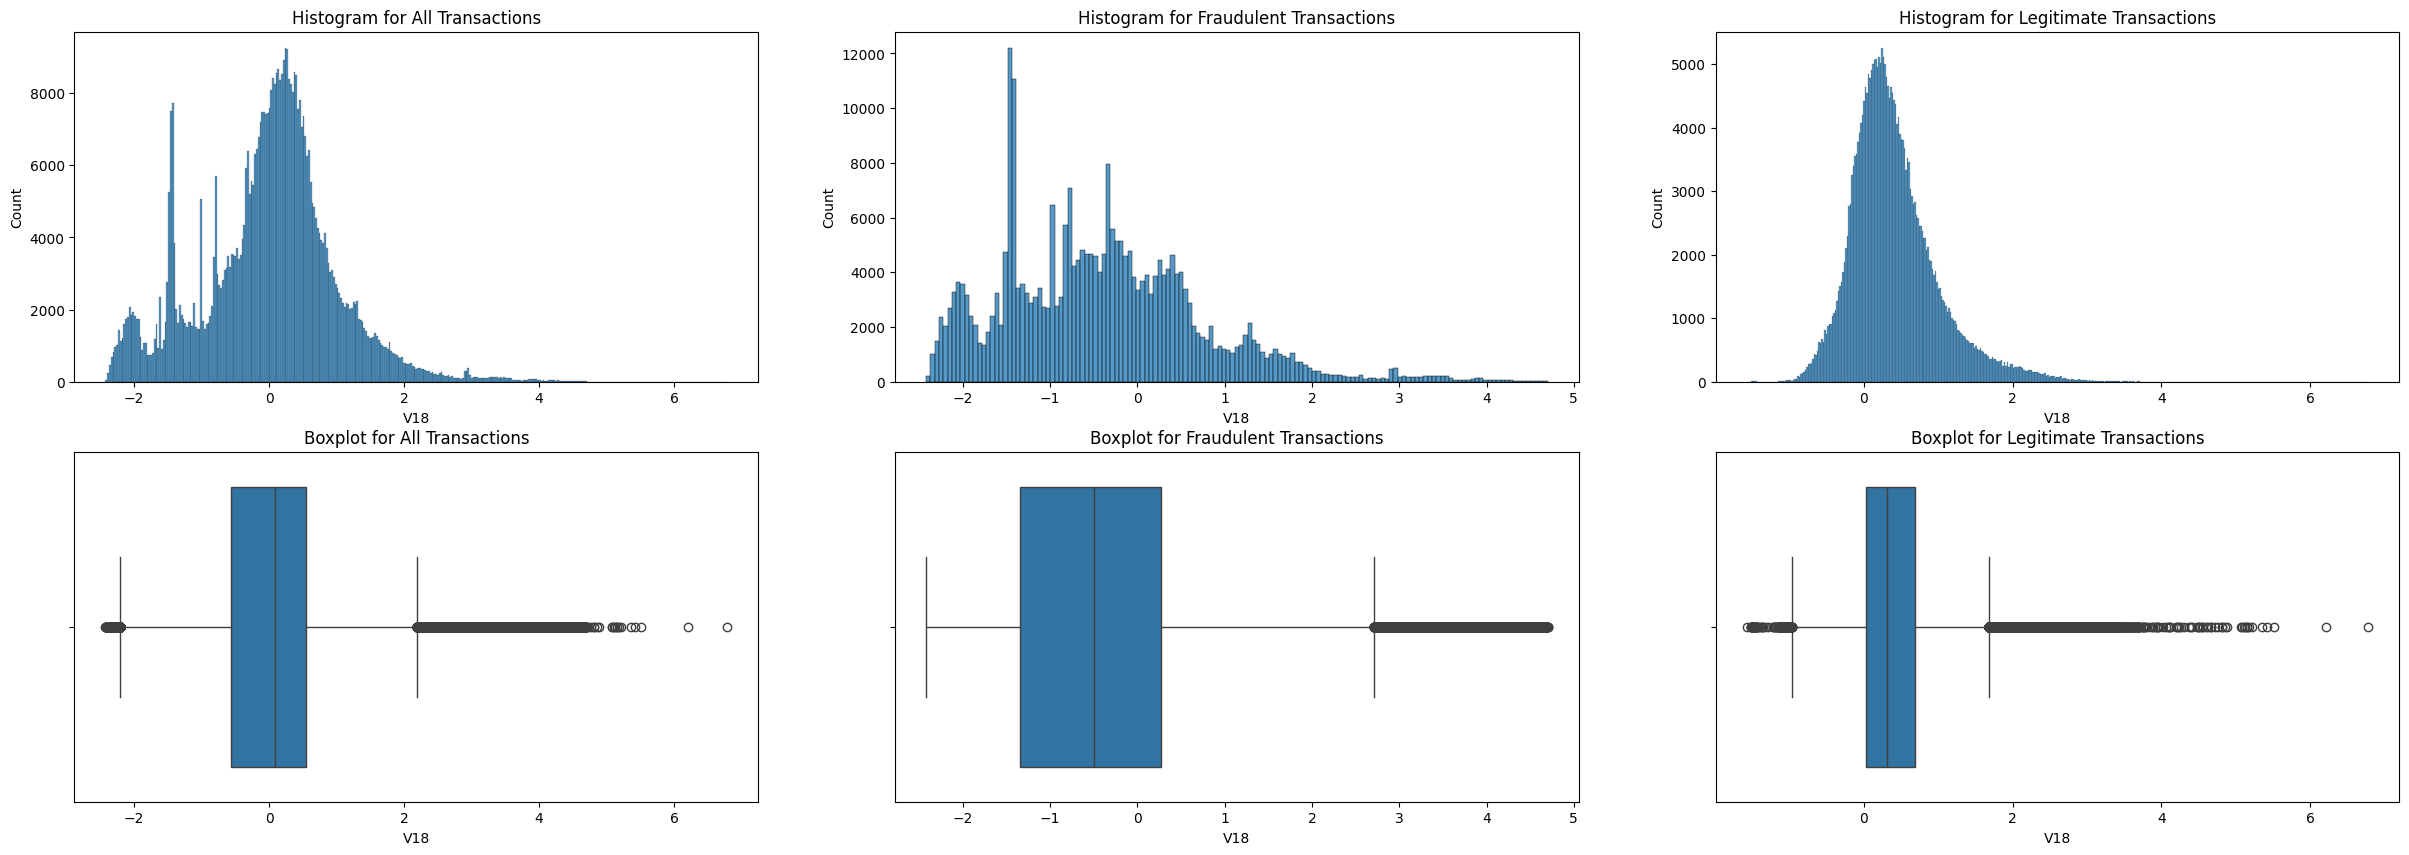

In [69]:
plot_hist_and_box(df,'V18')

### V19

Now we're more Gaussian

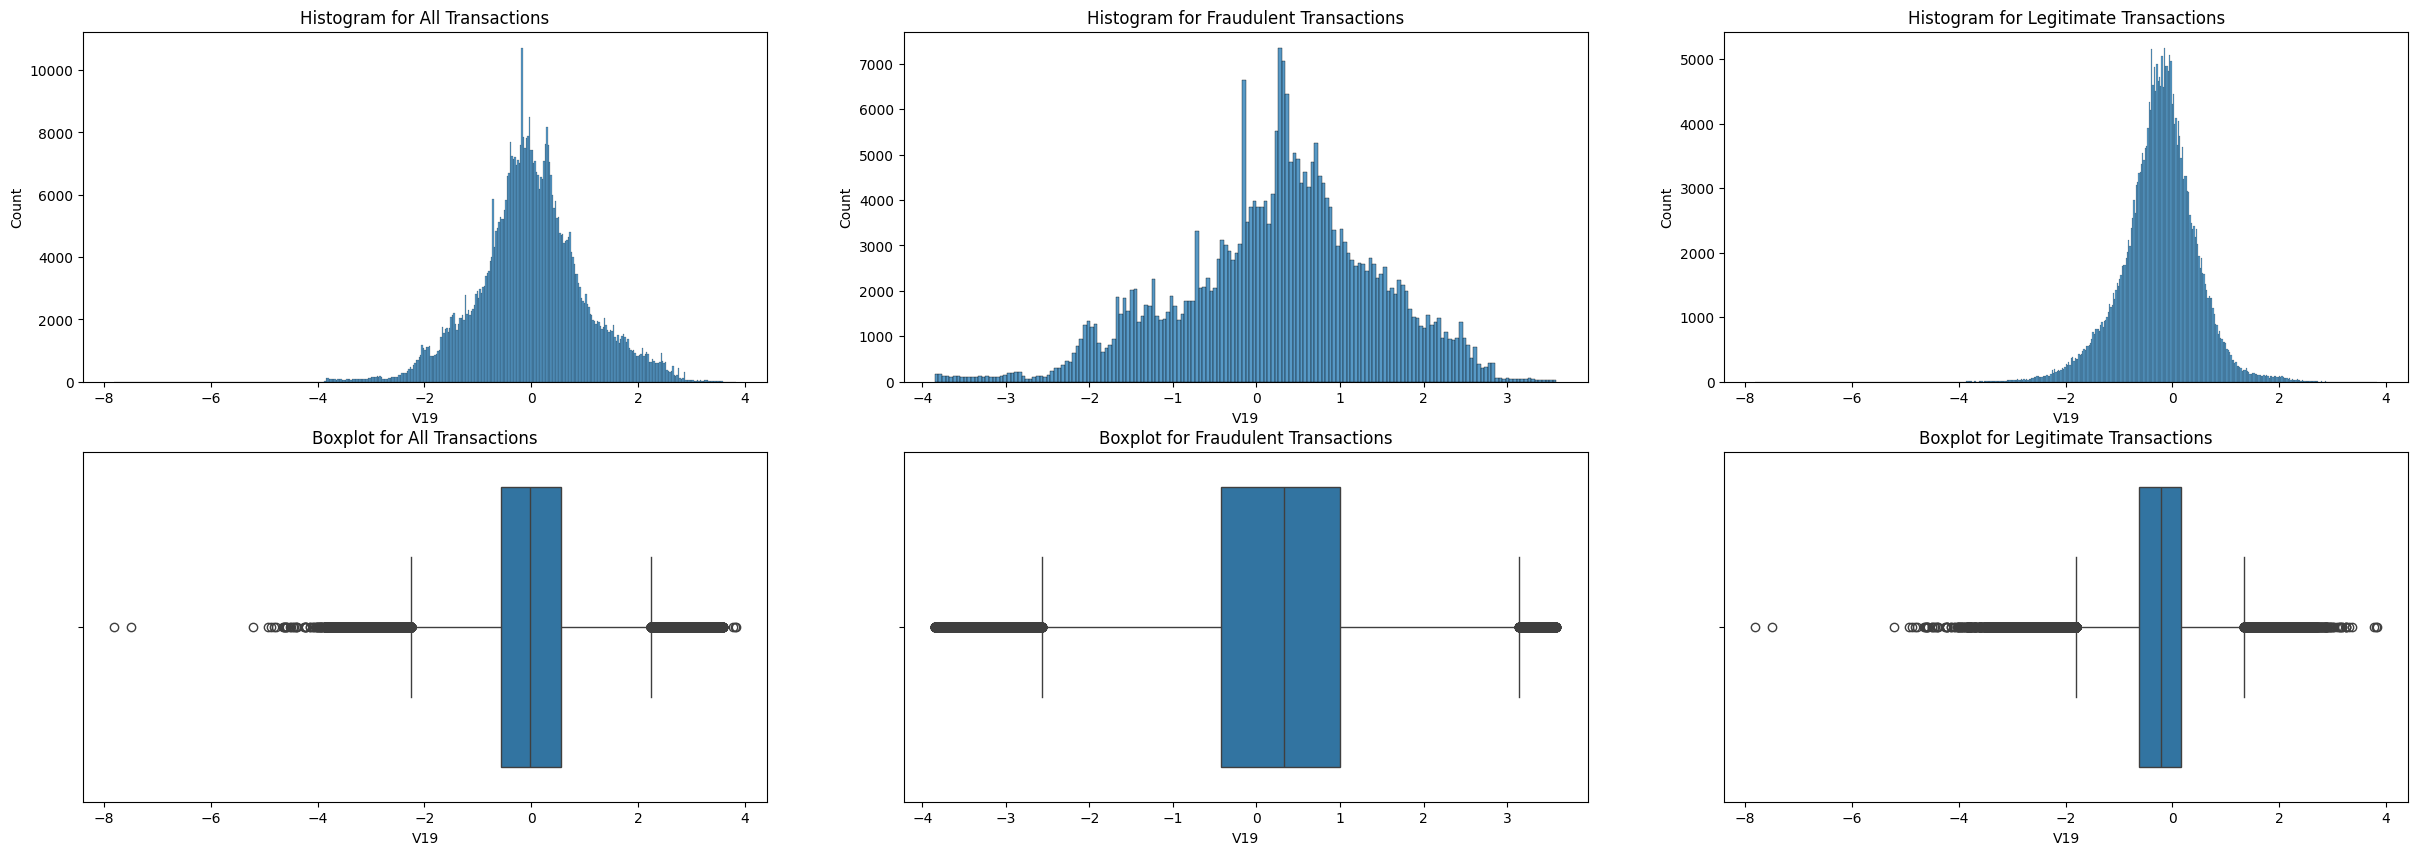

In [70]:
plot_hist_and_box(df,'V19')

### V20

Mostly Gaussian, but overall V20 and legitimate transactions have a very narrow distribution

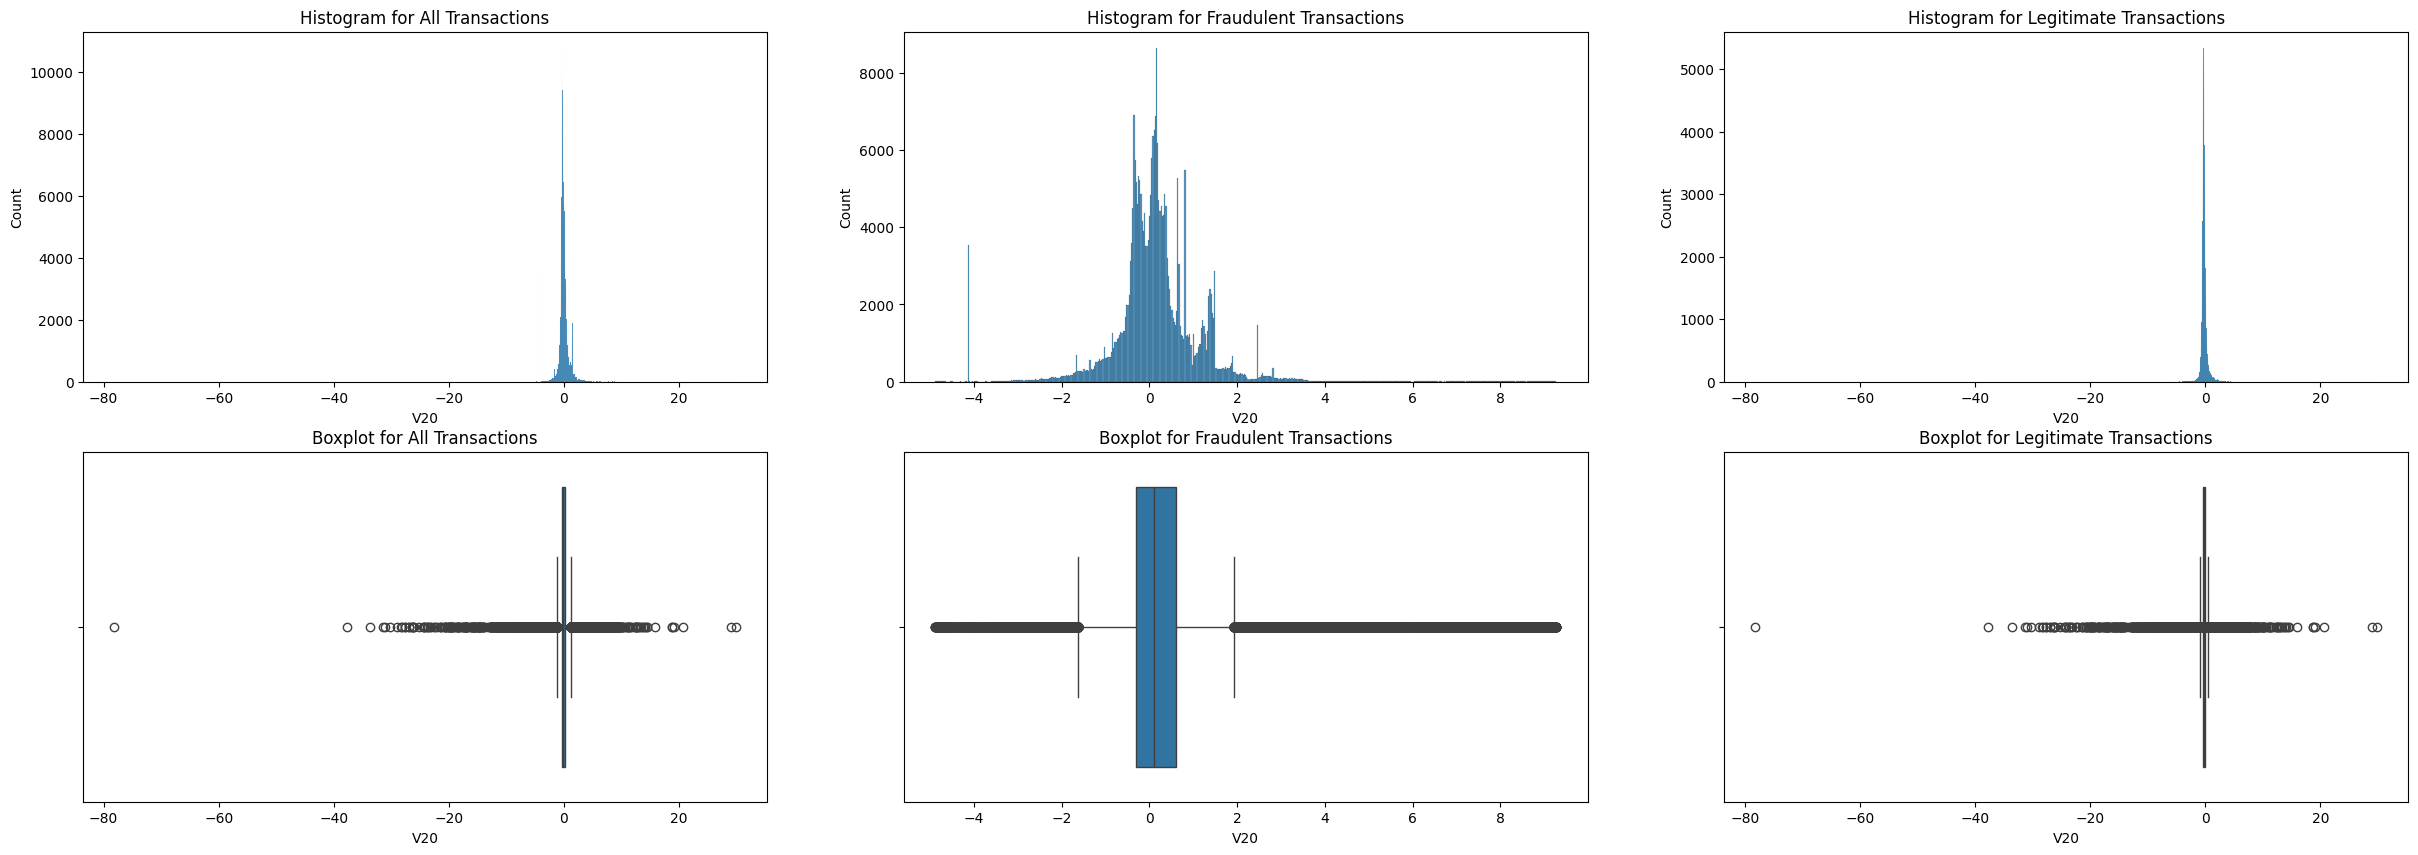

In [71]:
plot_hist_and_box(df,'V20')

### V21

Gaussian and narrow distribution across the board

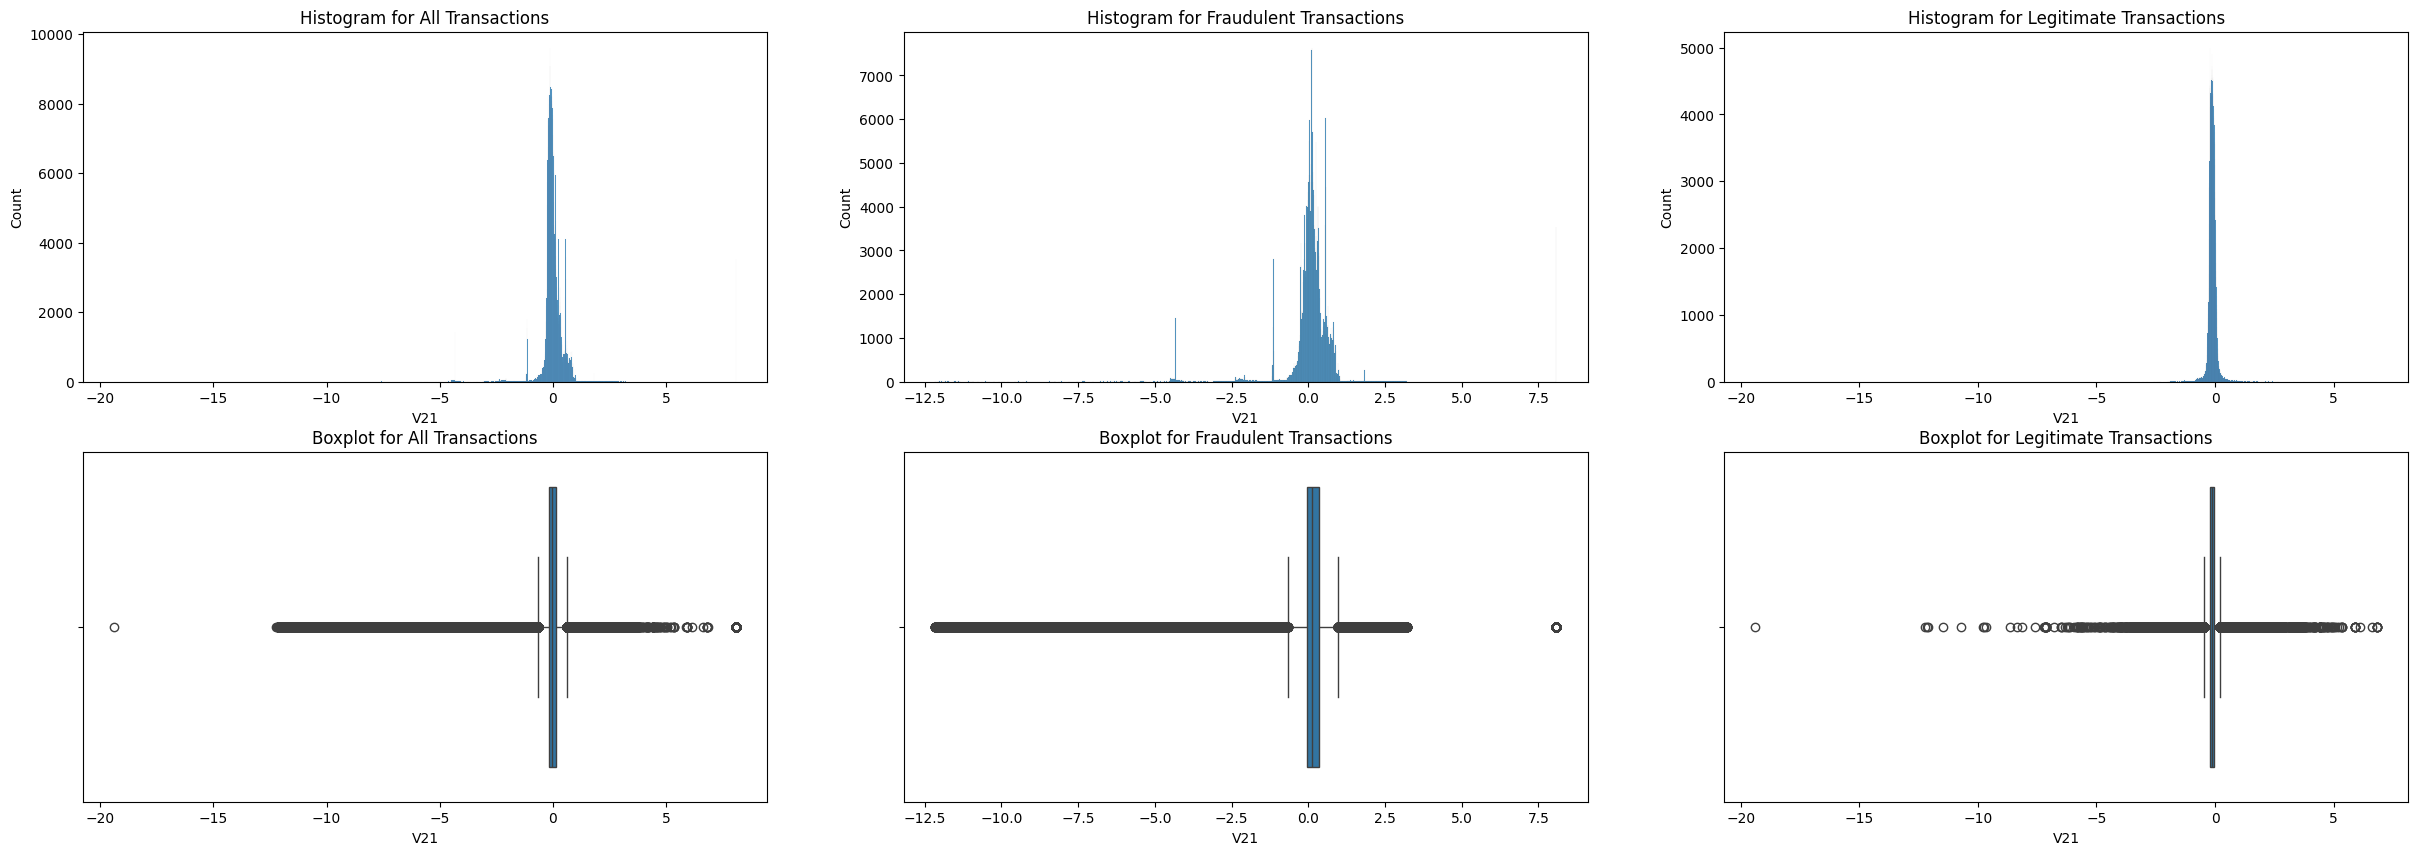

In [72]:
plot_hist_and_box(df,'V21')

### V22

Mostly Gaussian with some spikes

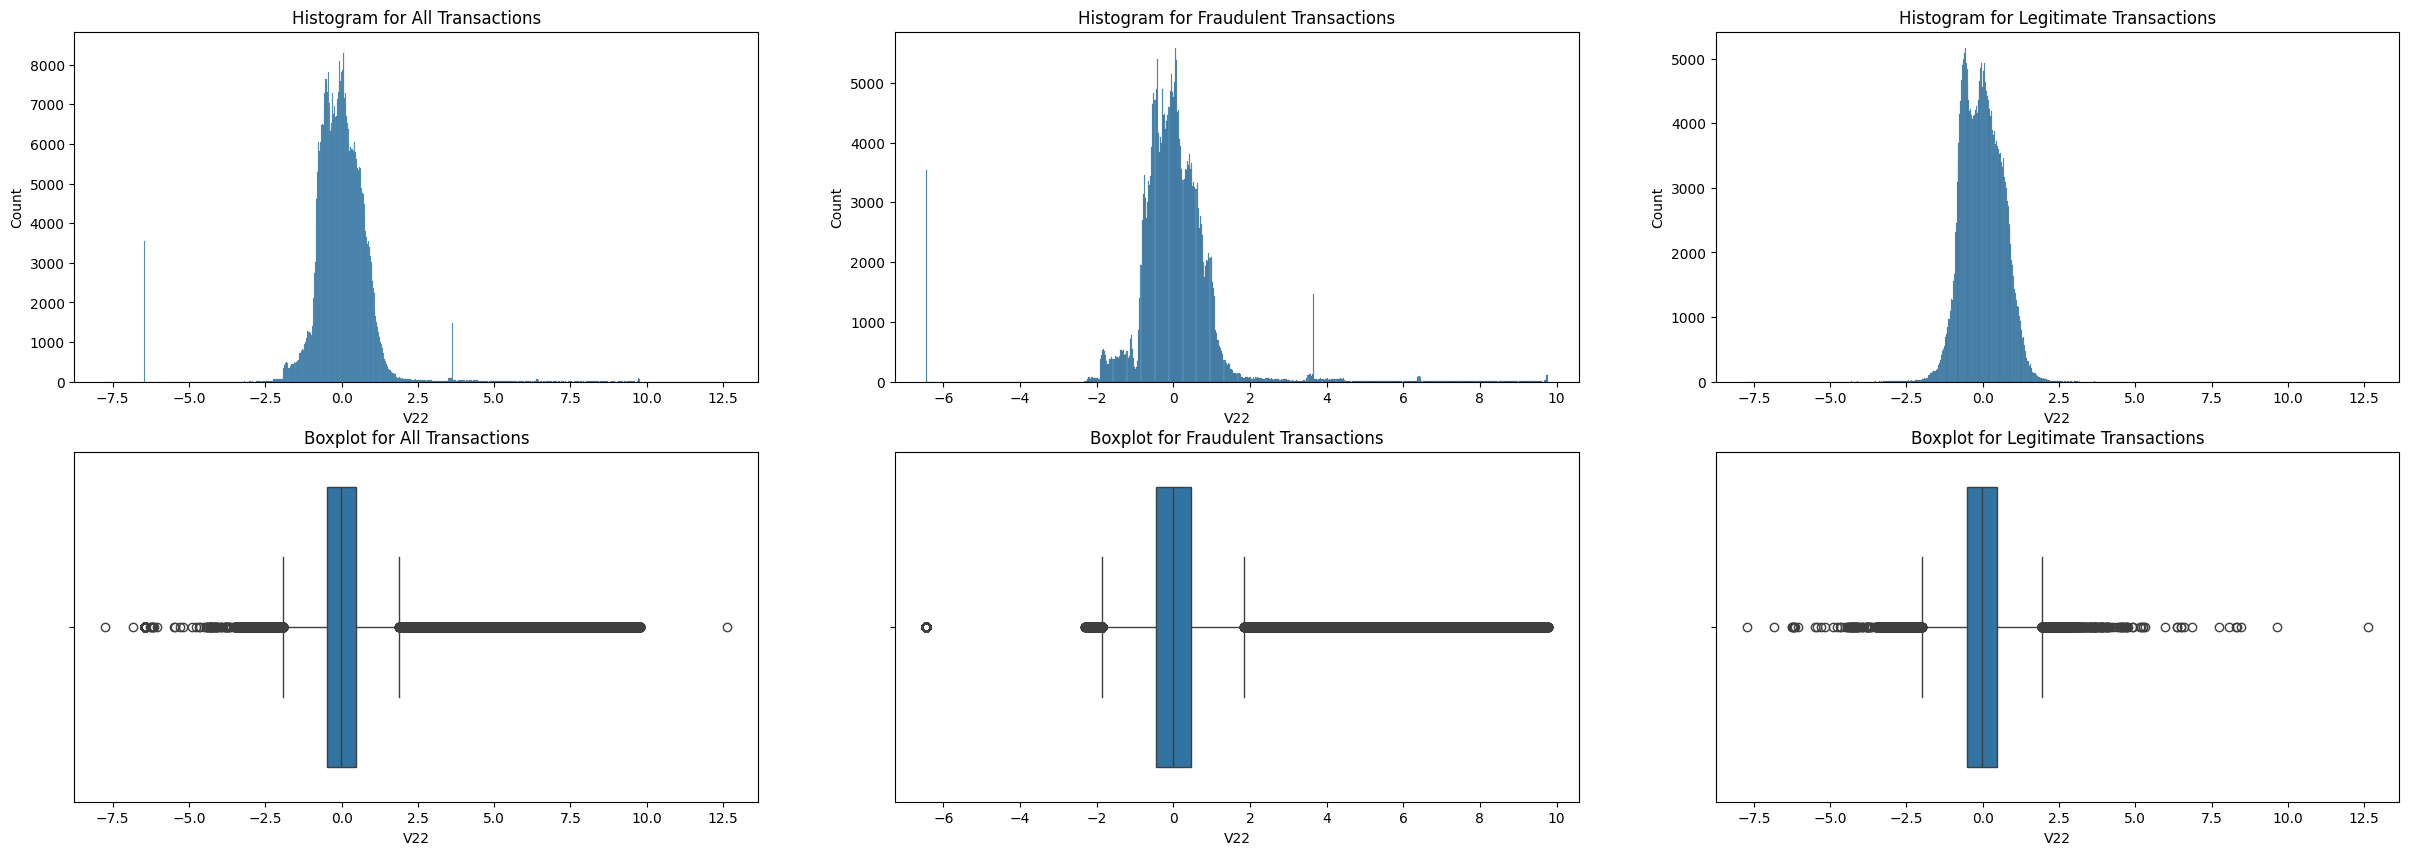

In [74]:
plot_hist_and_box(df,'V22')

### V23

Gaussian with narrow distribution

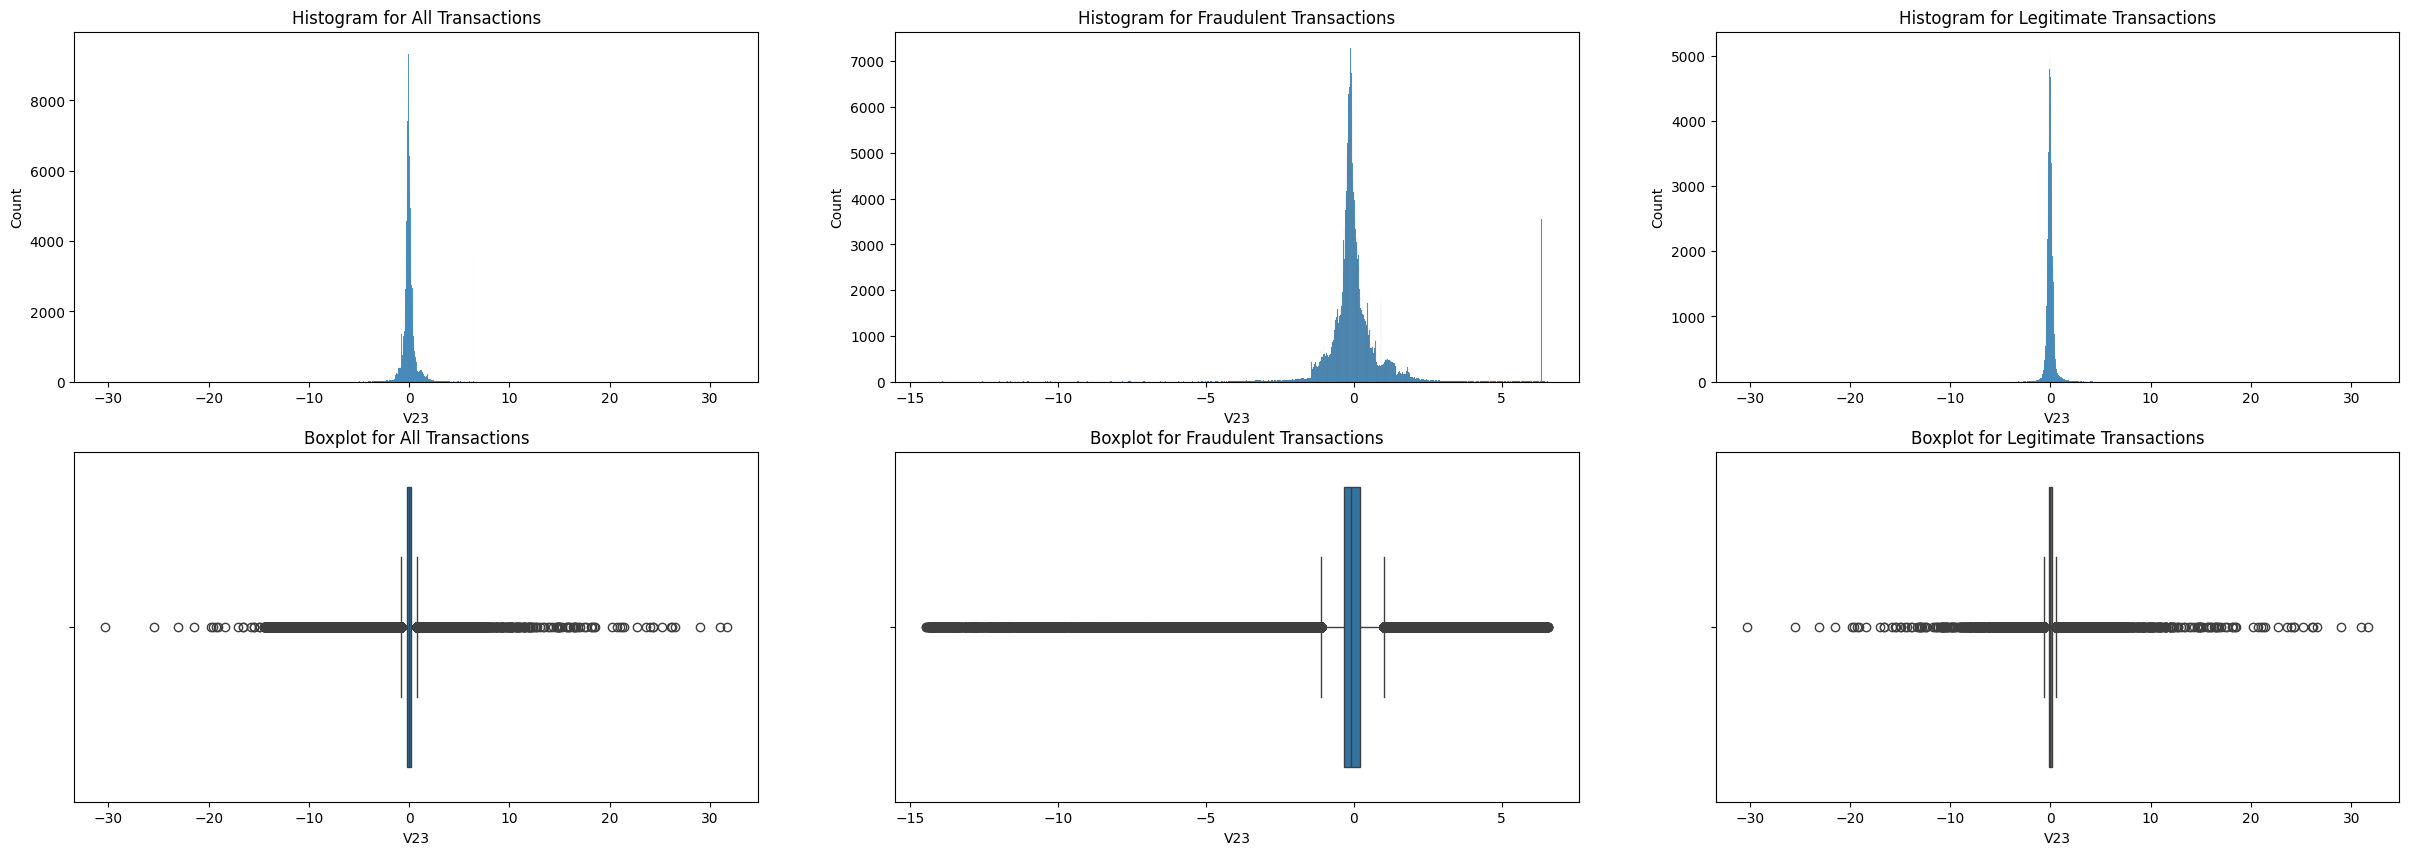

In [75]:
plot_hist_and_box(df,'V23')

### V24

Gauss is rolling in his grave right about now

There is a suspicous gap in data with the legitimate transactions

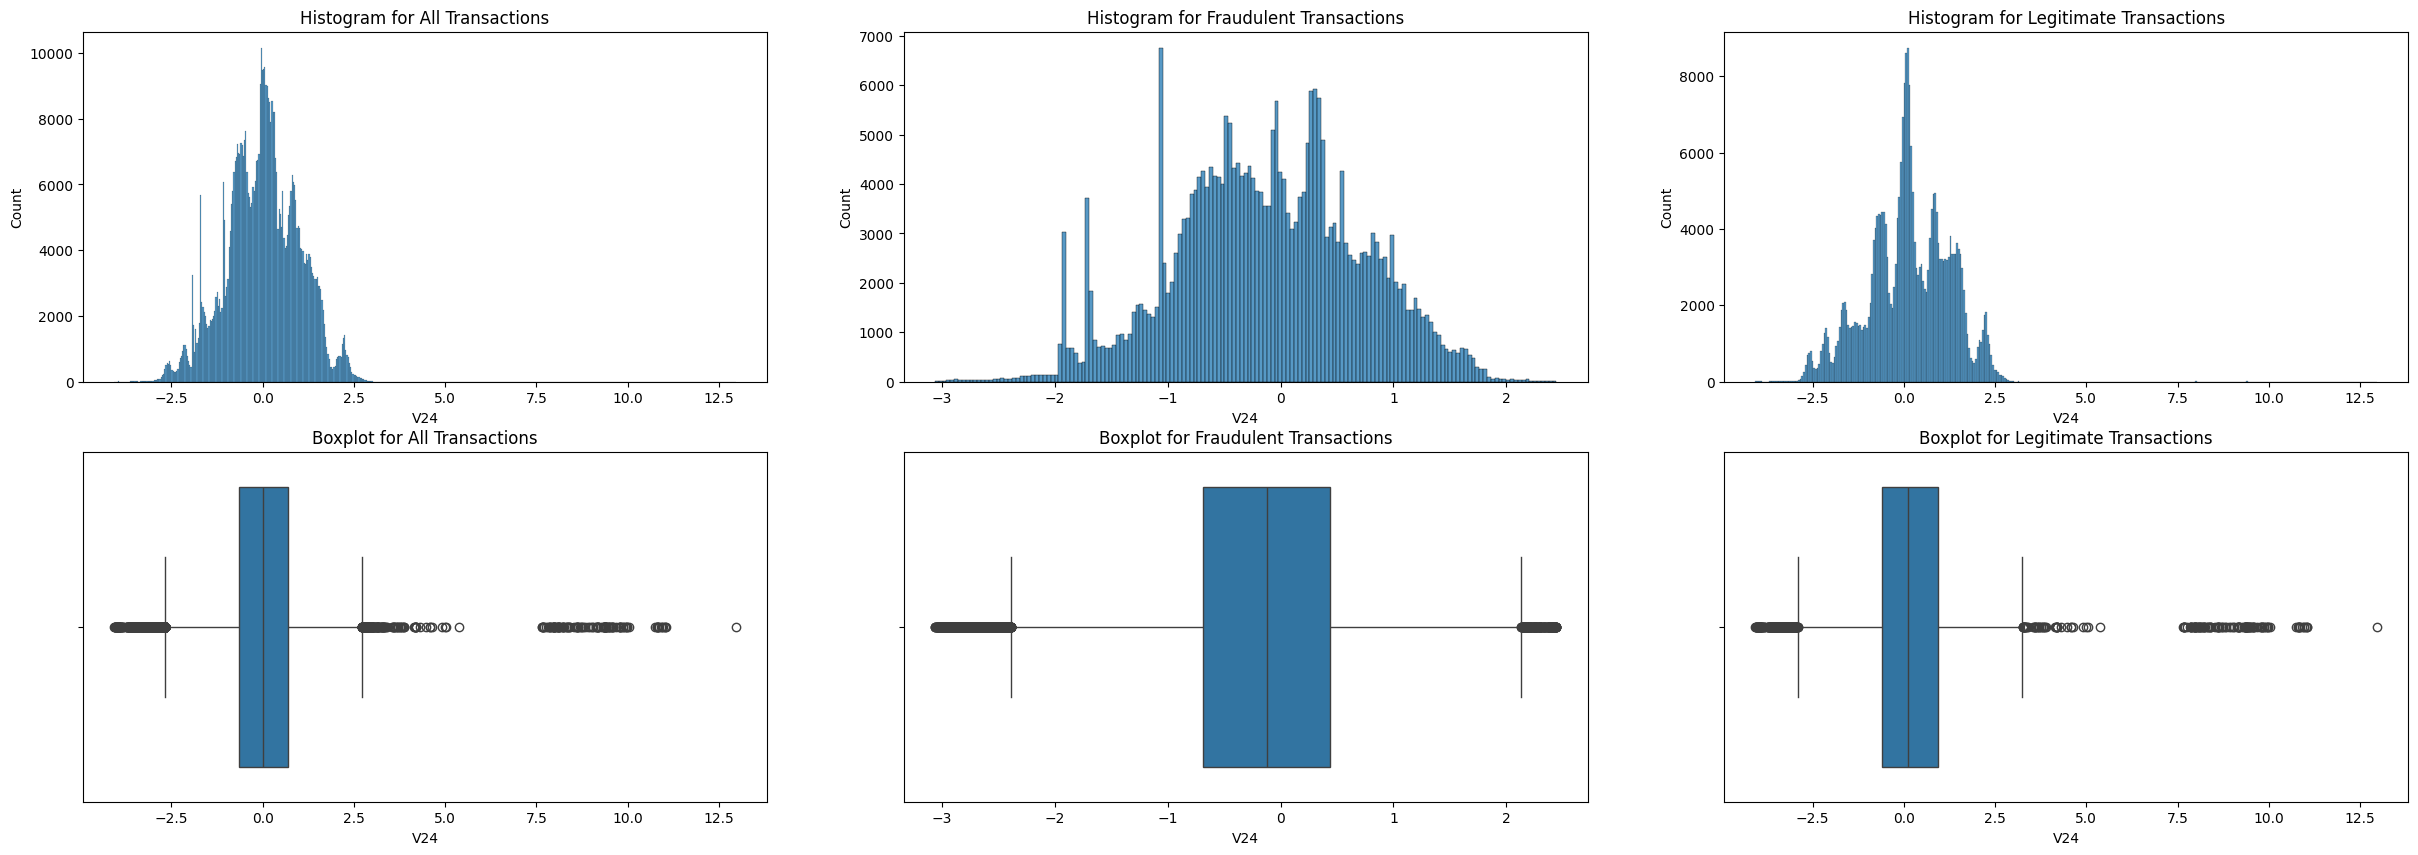

In [76]:
plot_hist_and_box(df,'V24')

### V25

Gaussian with narrow distribution and a few spikes

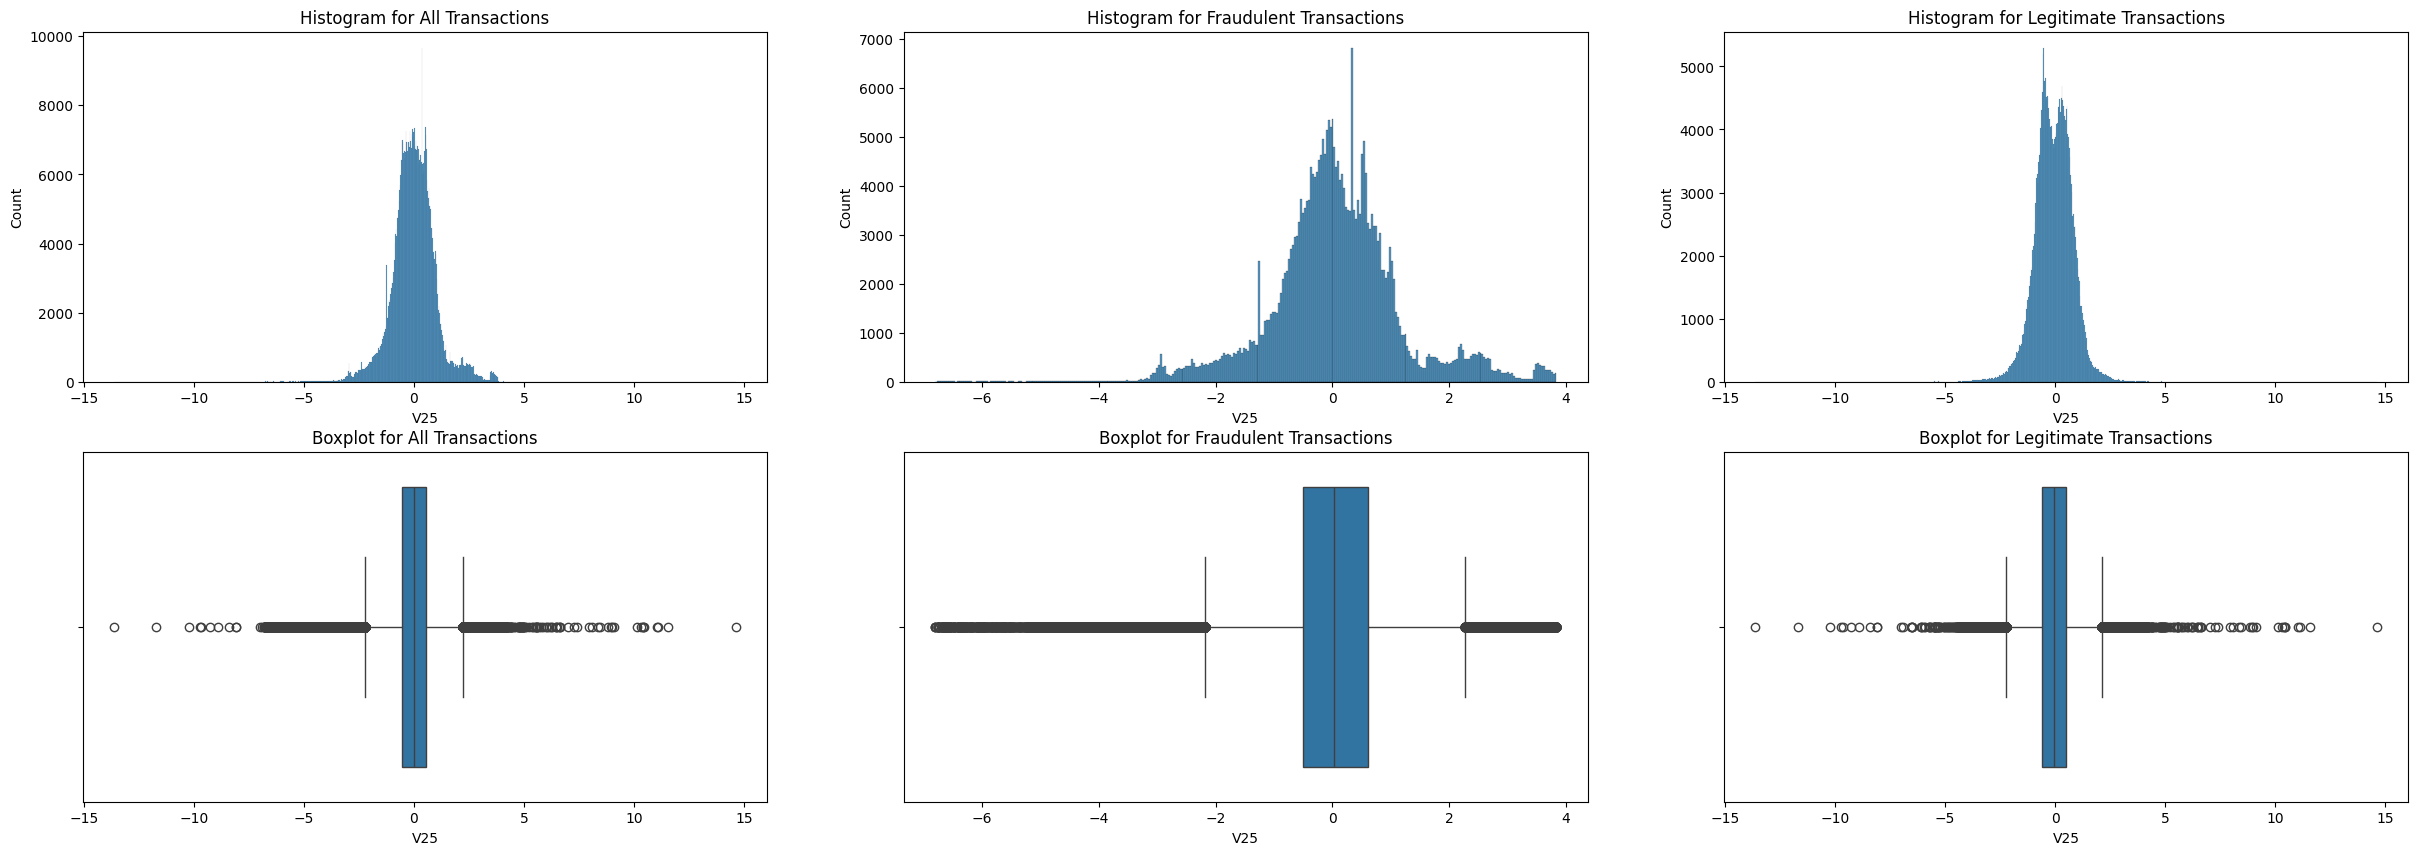

In [77]:
plot_hist_and_box(df,'V25')

### V26

It looks Gaussian if you squint

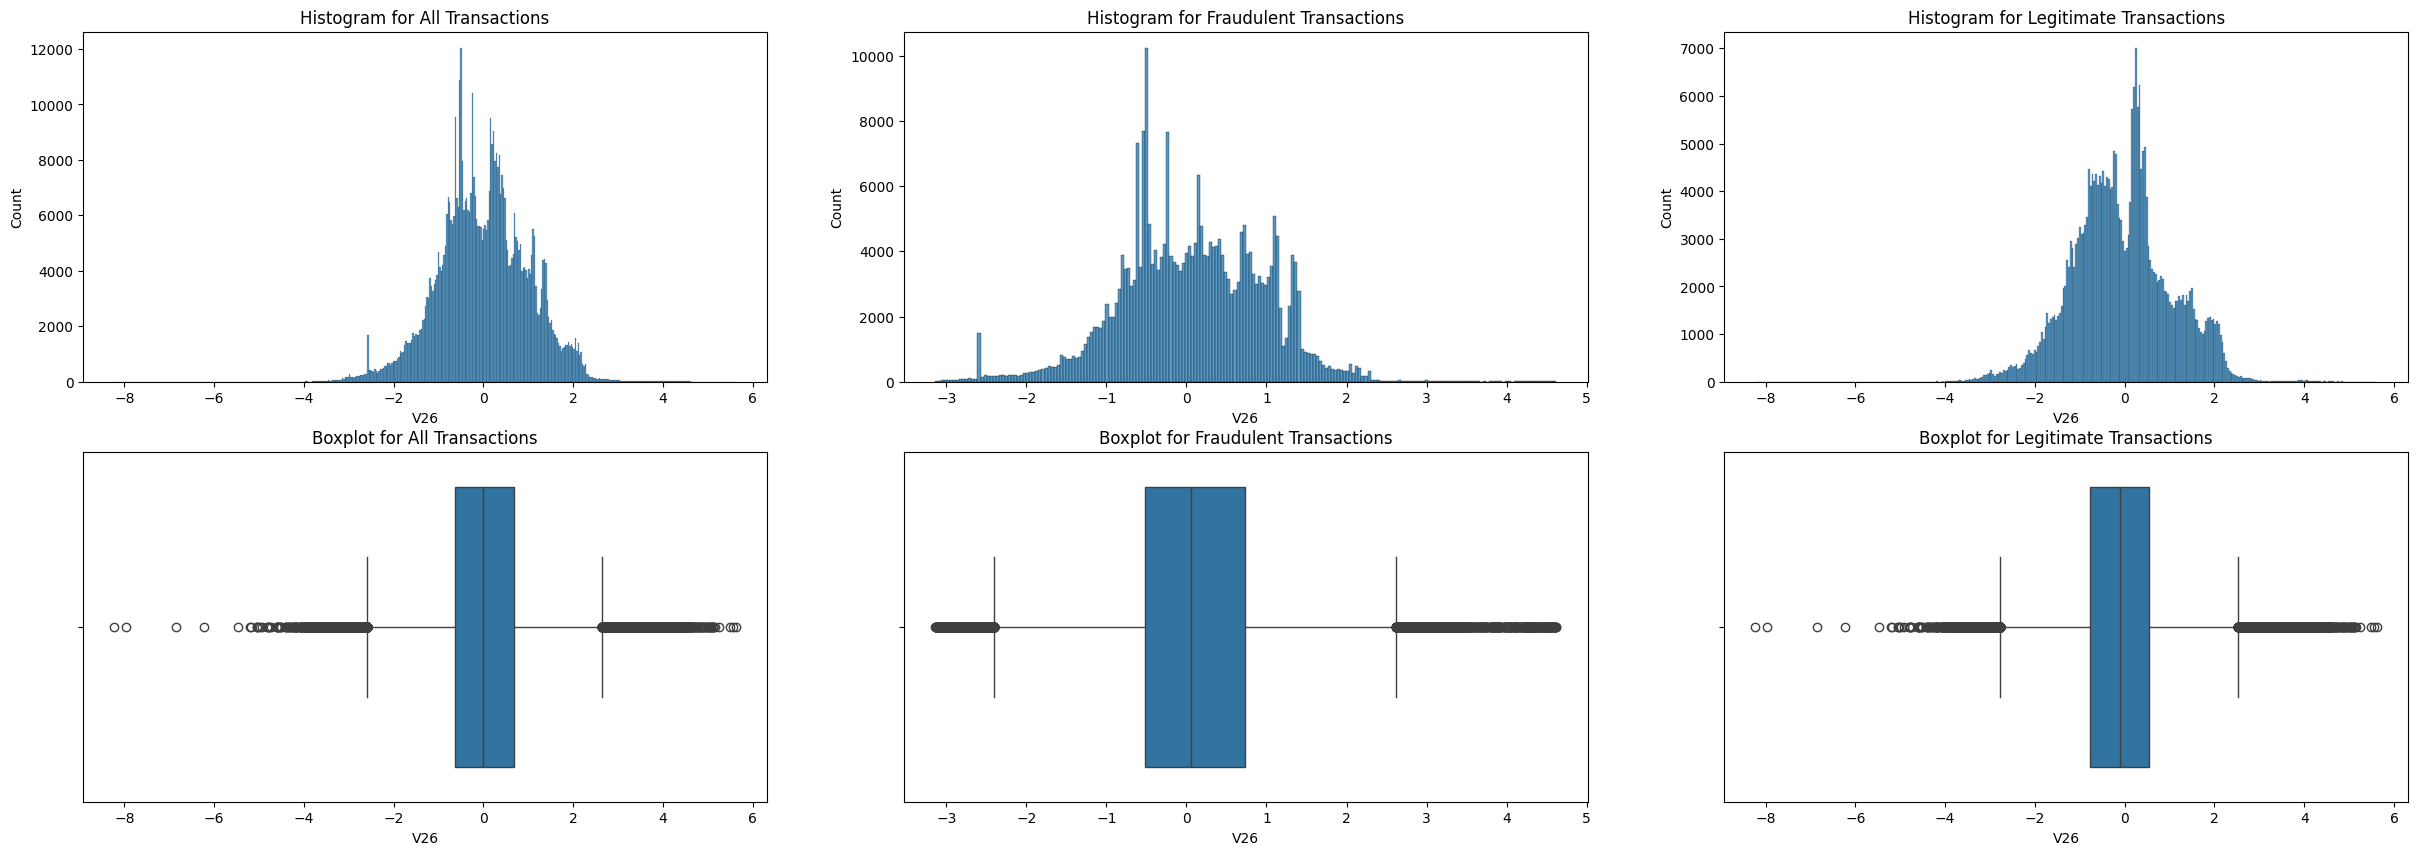

In [78]:
plot_hist_and_box(df,'V26')

### V27

The gap between most of the data and that one outlier is ridiculous

Also fraudulent data is very much not Gaussian

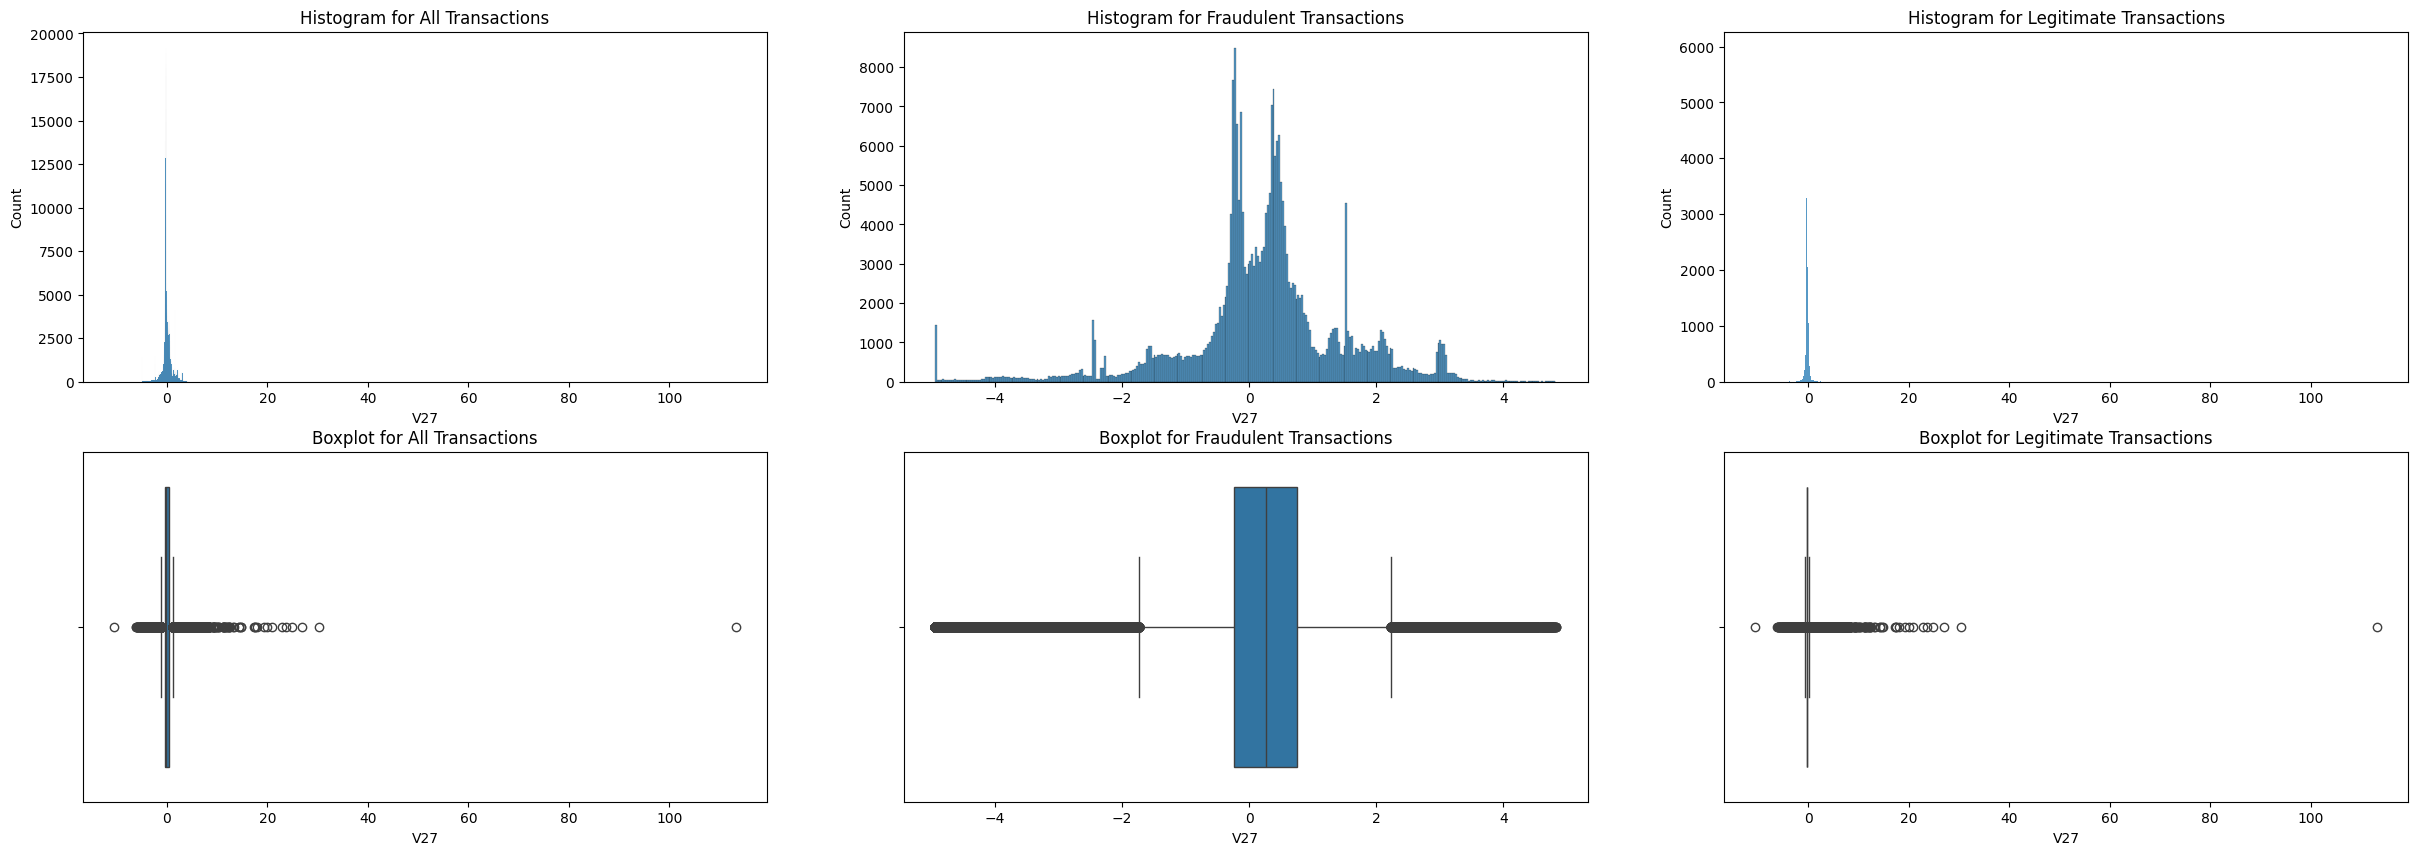

In [79]:
plot_hist_and_box(df,'V27')

### V28

Gaussian with narrow distribution except for fraudulent transactions

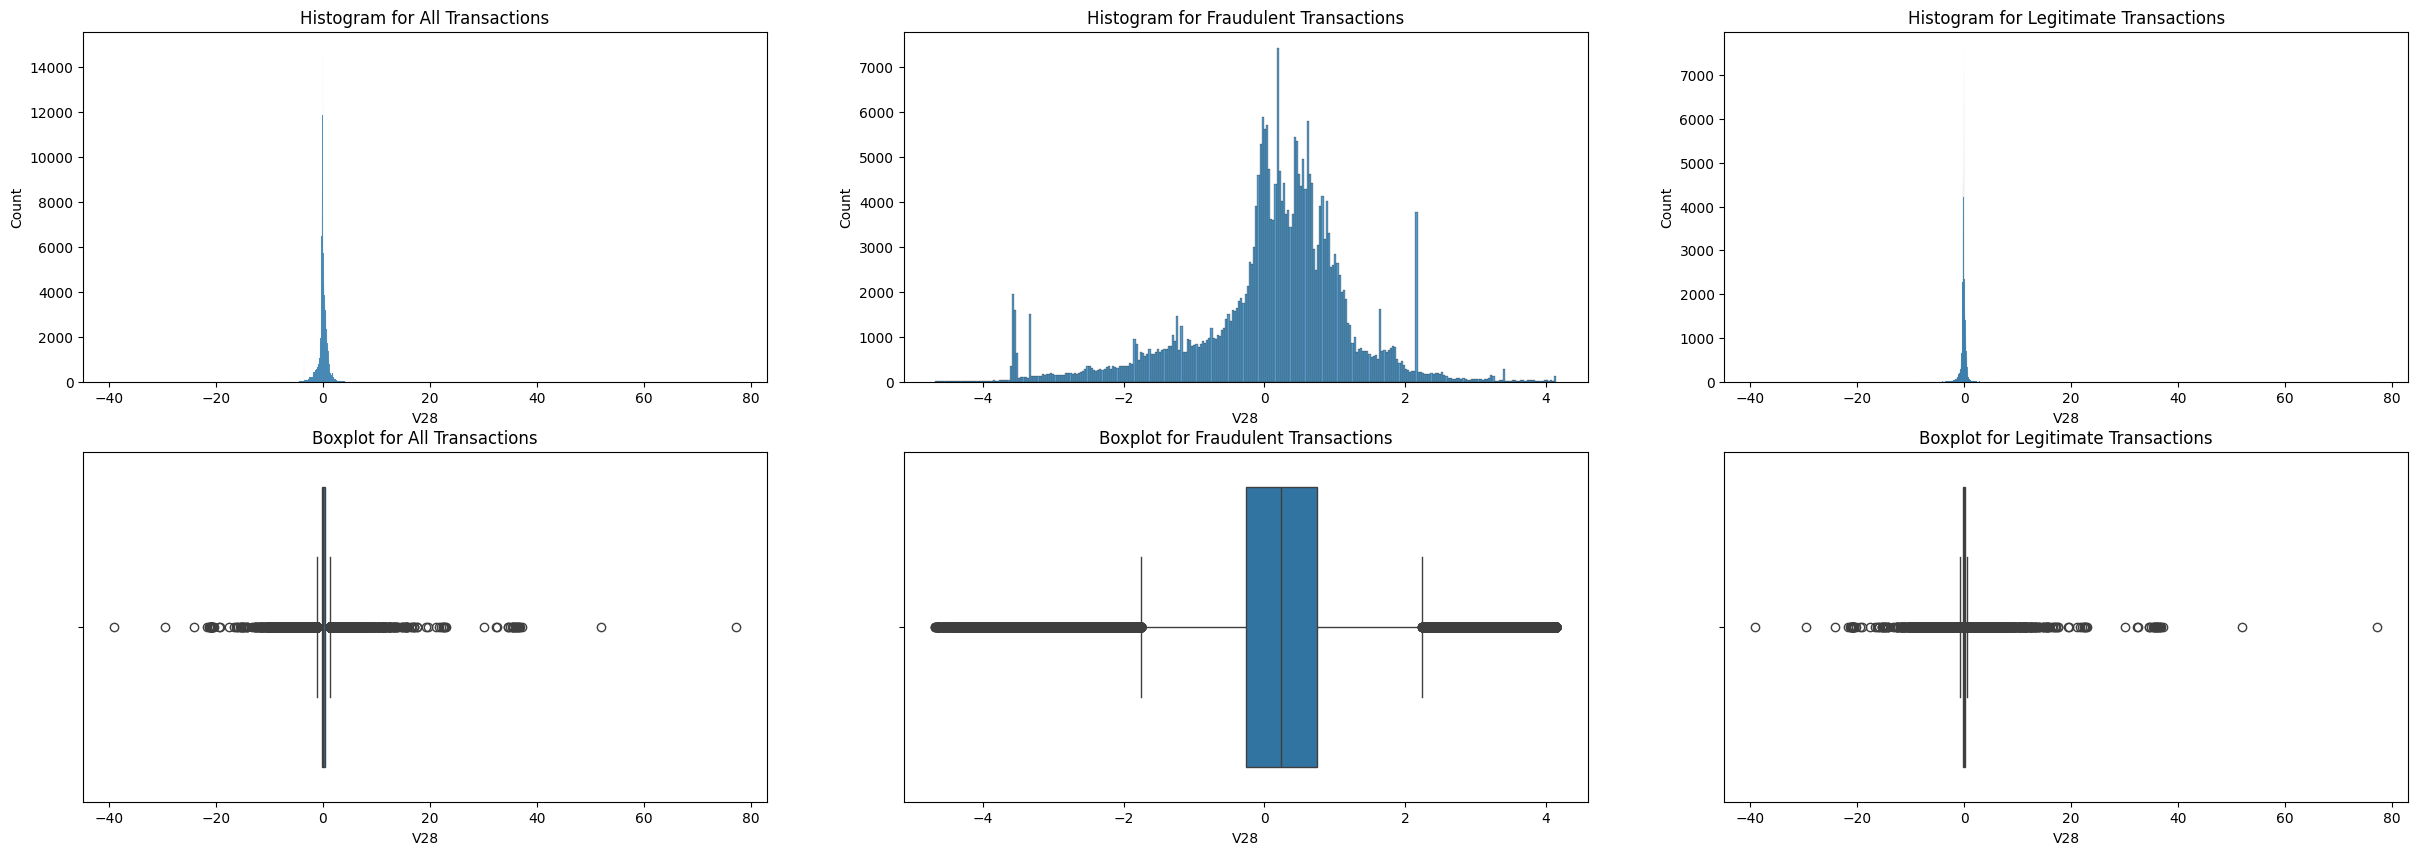

In [80]:
plot_hist_and_box(df,'V28')

### Amount

Pretty much uniform distribution

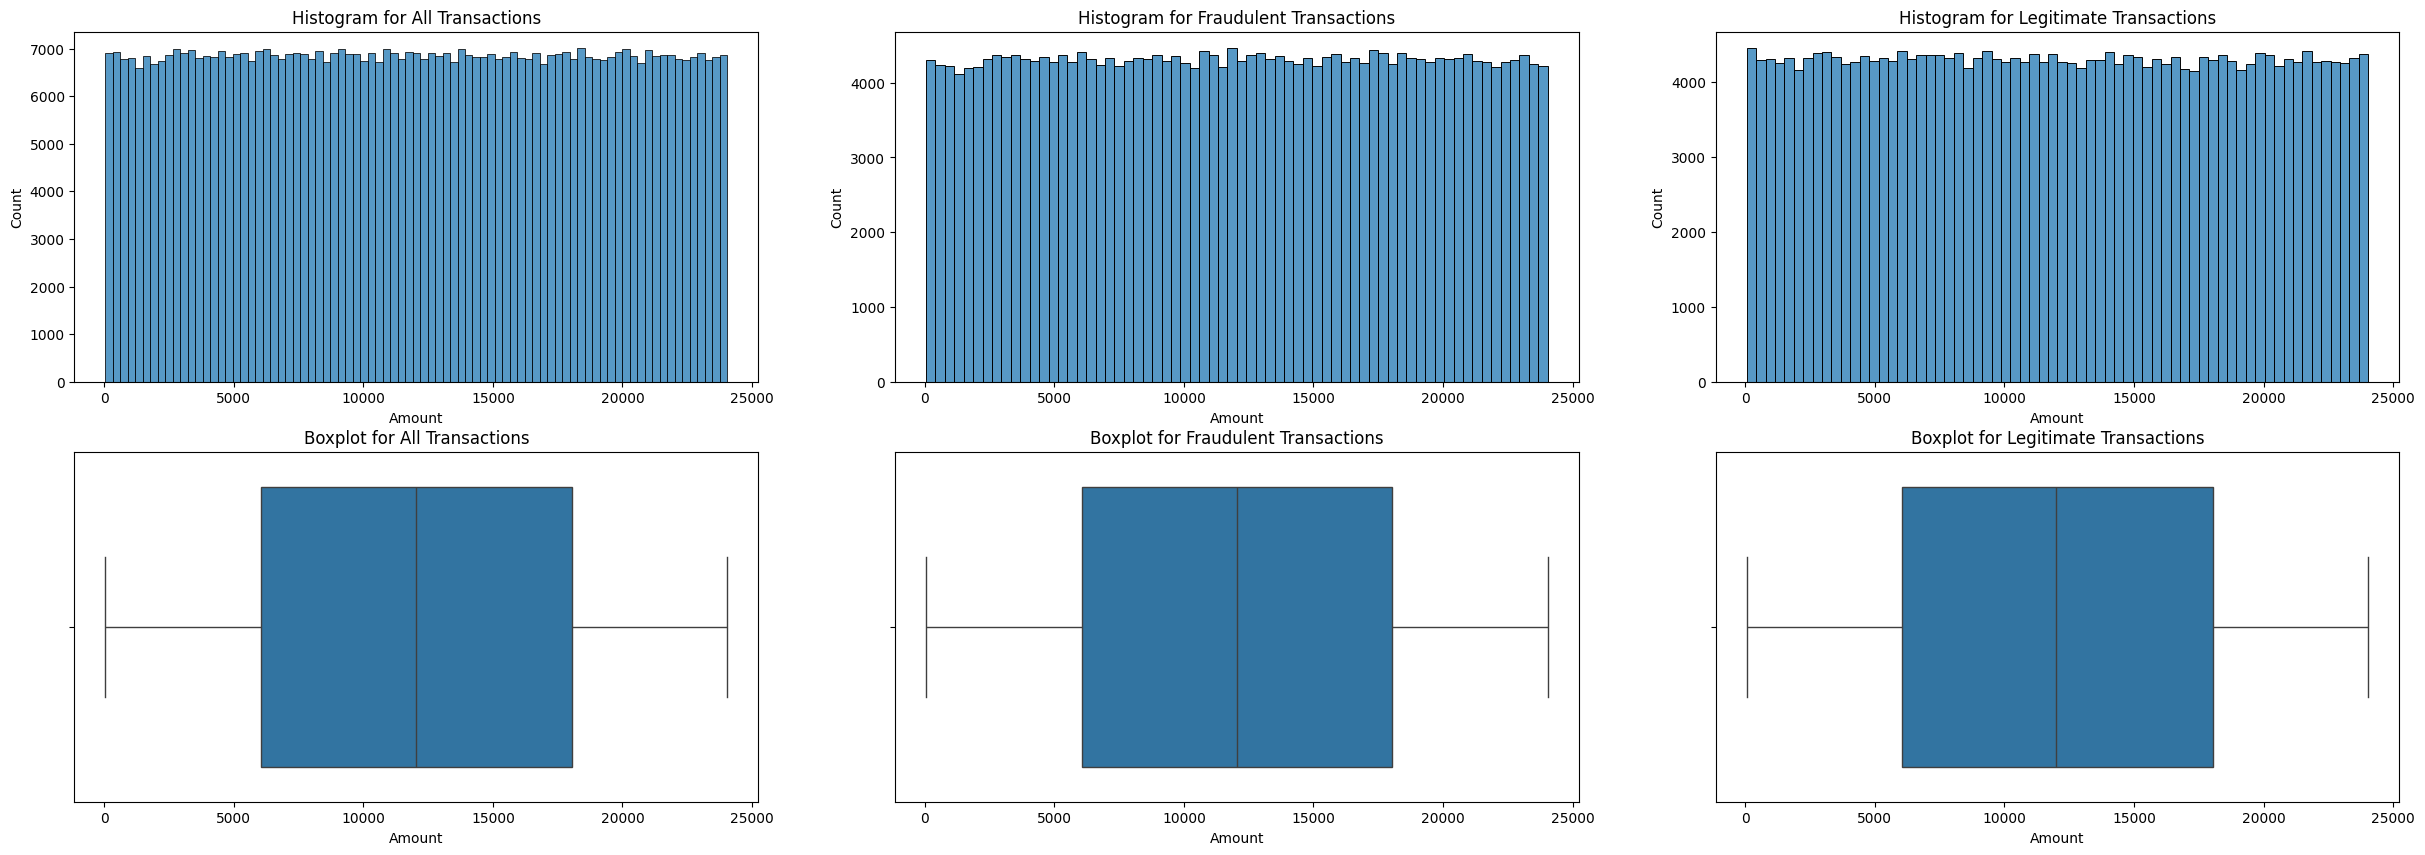

In [92]:
plot_hist_and_box(df,'Amount')

### Heatmap

We use this to take a glance at how certain columns correlate to Class

id has a suspicious correlation with class. Possibly because the front half of the data is legitimate transactions while the back half is fraudulent transactions 

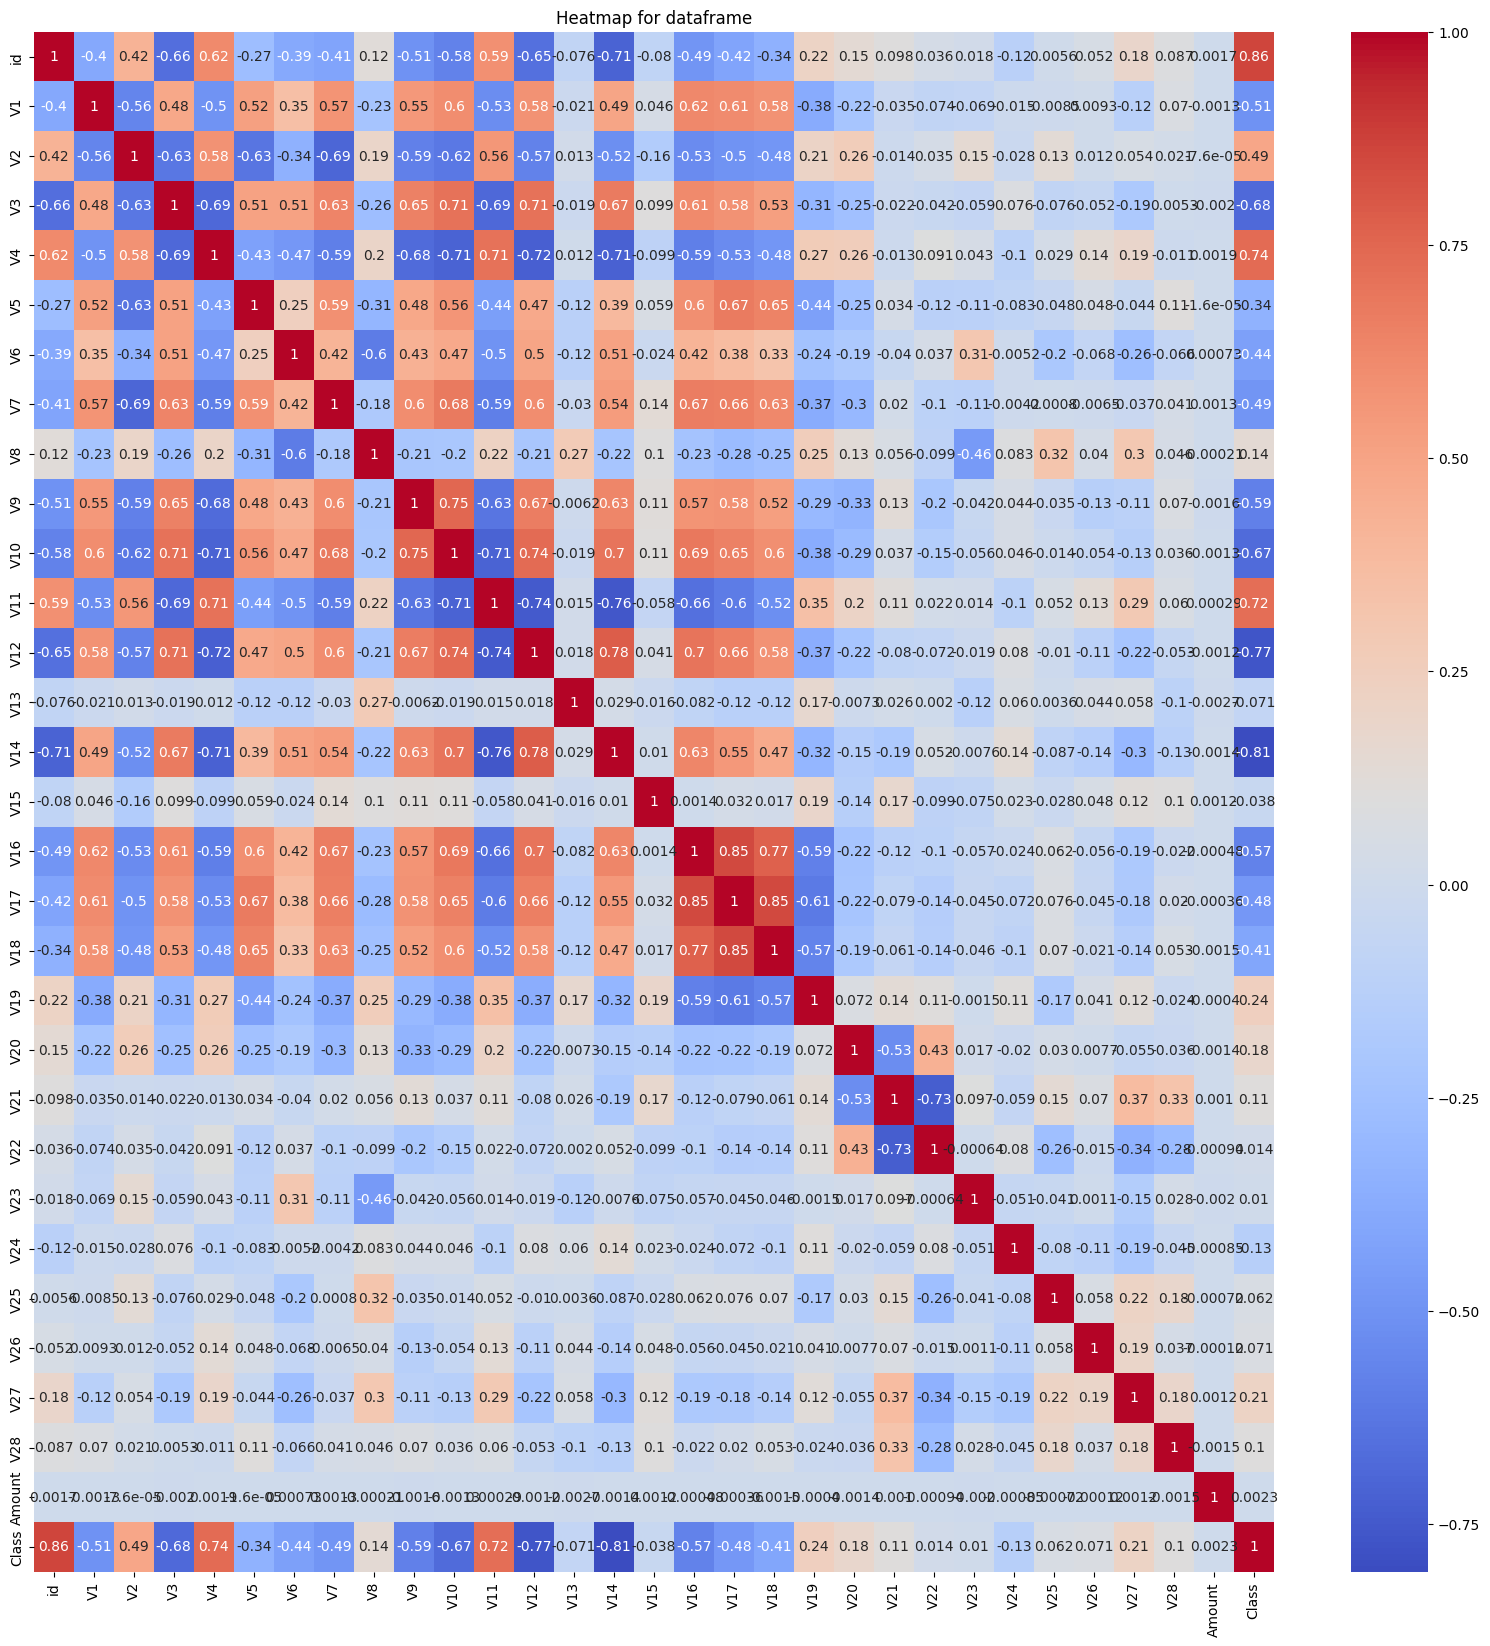

In [91]:
draw_heat_graph(df)

## With Changing Data

So we noticed there are a lot of outliers here. We will experiment with some modifications to make things work better.

We'll start by removing the extreme outlier found in most of our data

Turns out it isn't just one data point with extreme data, so simply removing a singular point will not do the trick

In [8]:
#df2 = df.drop(df['V3'].idxmax())

Now we'll try using the RobustScaler

RobustScaling didn't give results that differed notably from the original

Manual changes are in order

In [ ]:
# df2 = df.copy()
# for col in df2.columns:
#     if col != 'Class' and col != 'id':
#         df2[col] = RobustScaler().fit_transform(df2[col].values.reshape(-1, 1))
#         plot_hist_and_box(df2, col)